In [1]:
#Charger les bibliothèques
import pandas as pd
pd.set_option("max_columns", None)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Image
from sklearn.pipeline import make_pipeline
import plotly.express as px
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering as agc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [234]:
# Acquisition des données
df=pd.read_csv("Country-data.csv", sep=";", decimal=",")
df.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090  
2        76.5       2.89  4460

In [235]:
#Dimension Information sur le dataset
N = df.shape[0]
K = df.shape[1]
print("Nombre d'individus",N)
print("Nombre de variables ",K)

Nombre d'individus 167
Nombre de variables  10


In [238]:
columns = df1.columns
#convert into list----------------
columns= list(columns)
columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [239]:
df1 = df.set_index(['country'])

In [240]:
df1 = df1.drop(['Haiti','Luxembourg','Malta','Singapore','Nigeria'], inplace = True)

In [241]:
df1 = df.drop(['country'], axis=1)

<Figure size 1440x576 with 0 Axes>

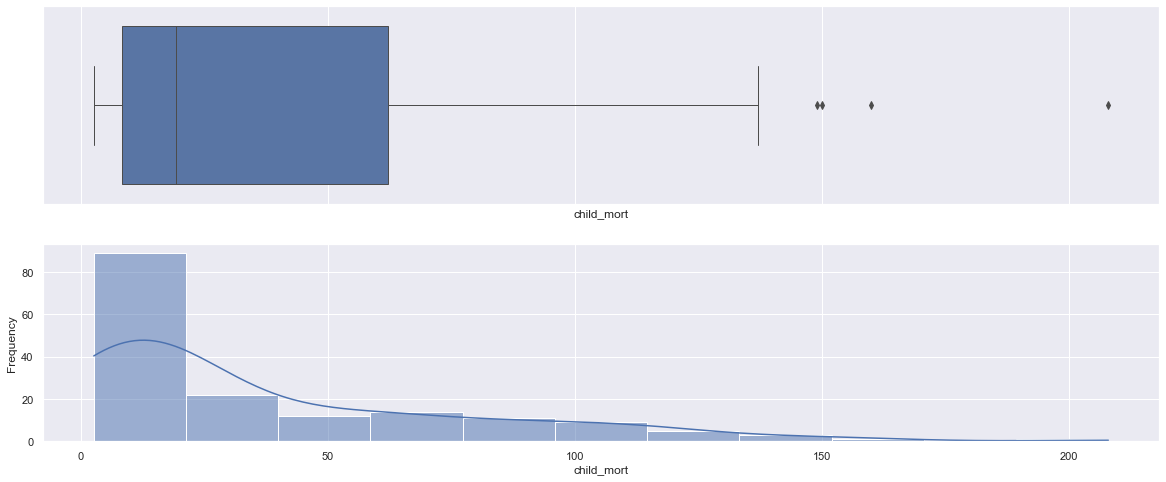

<Figure size 1440x576 with 0 Axes>

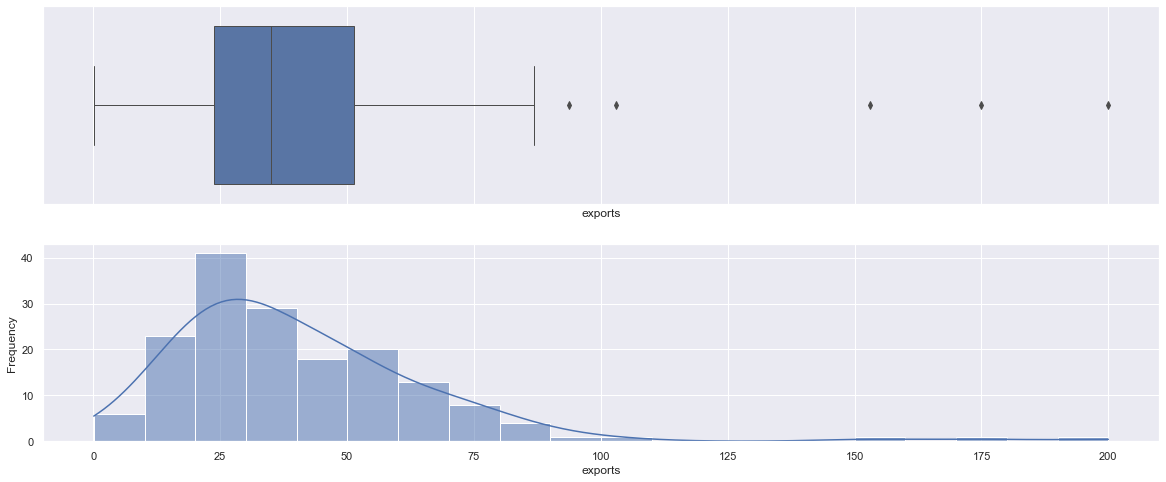

<Figure size 1440x576 with 0 Axes>

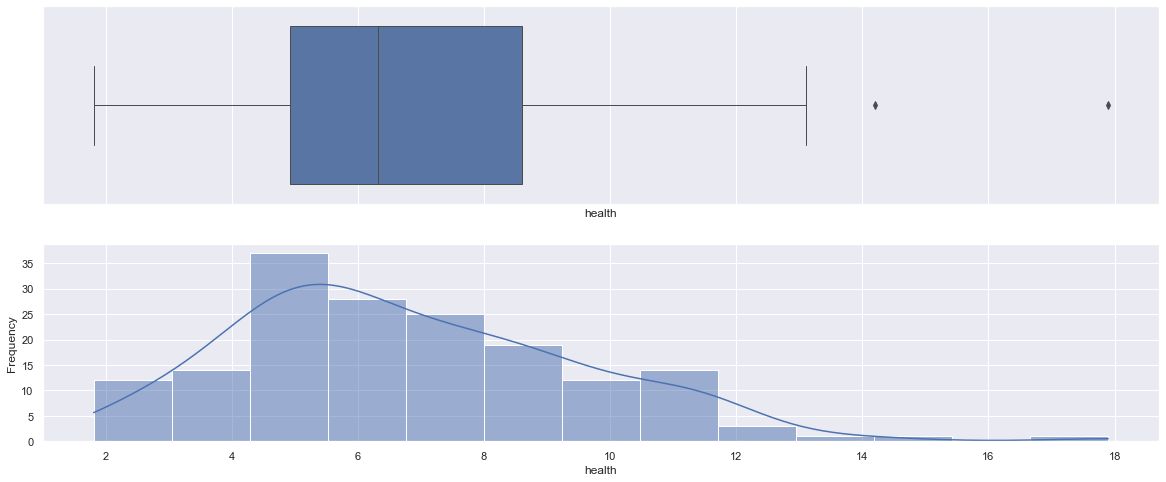

<Figure size 1440x576 with 0 Axes>

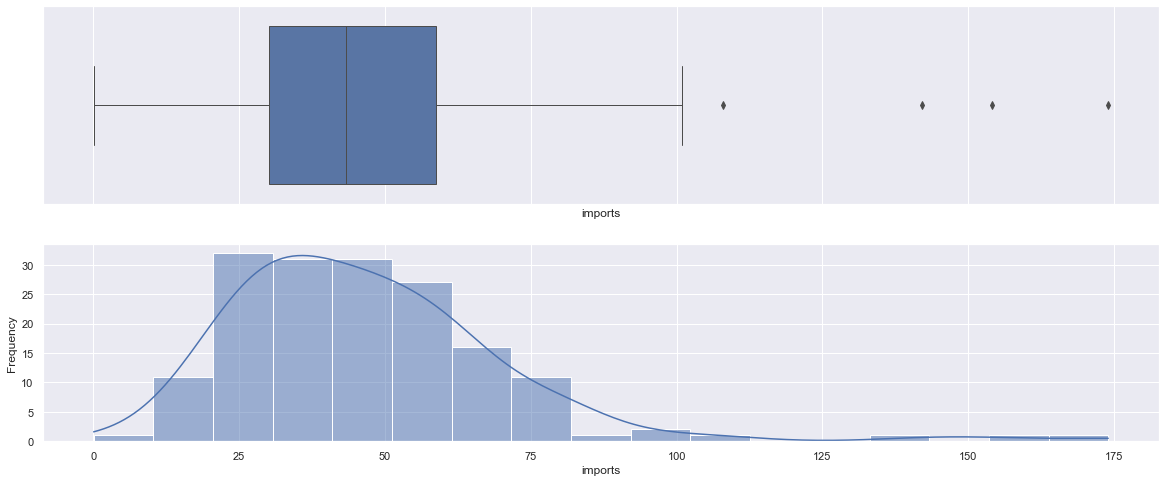

<Figure size 1440x576 with 0 Axes>

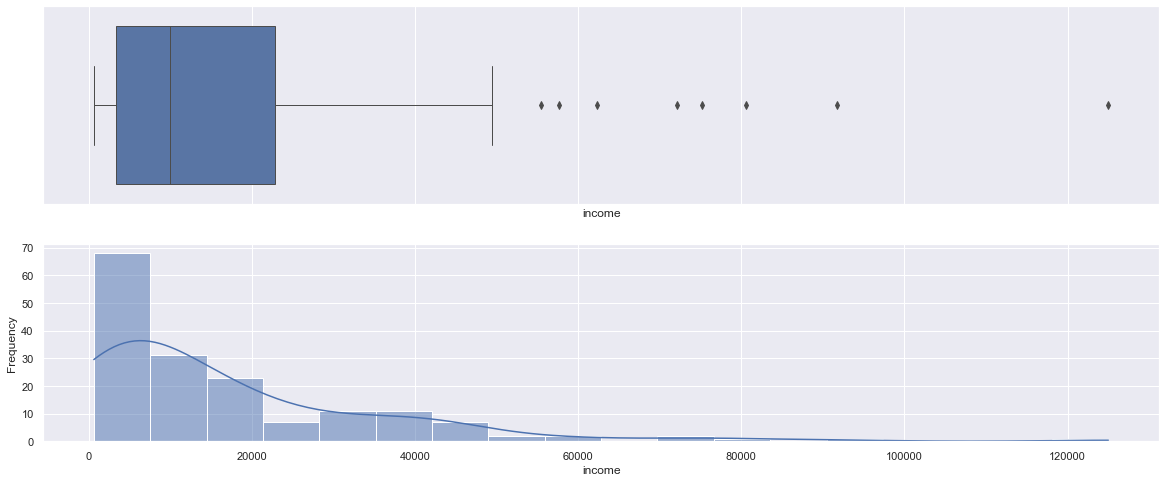

<Figure size 1440x576 with 0 Axes>

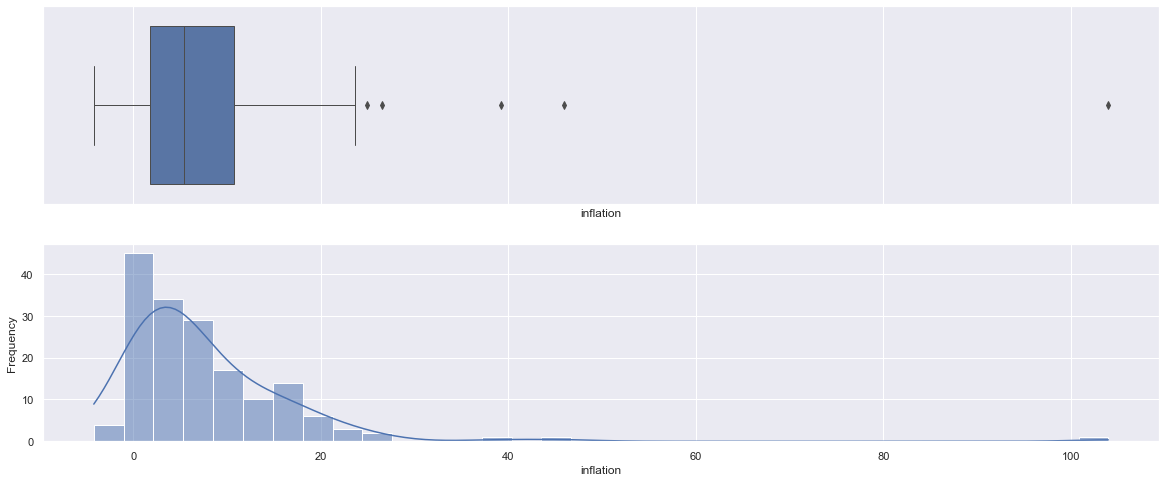

<Figure size 1440x576 with 0 Axes>

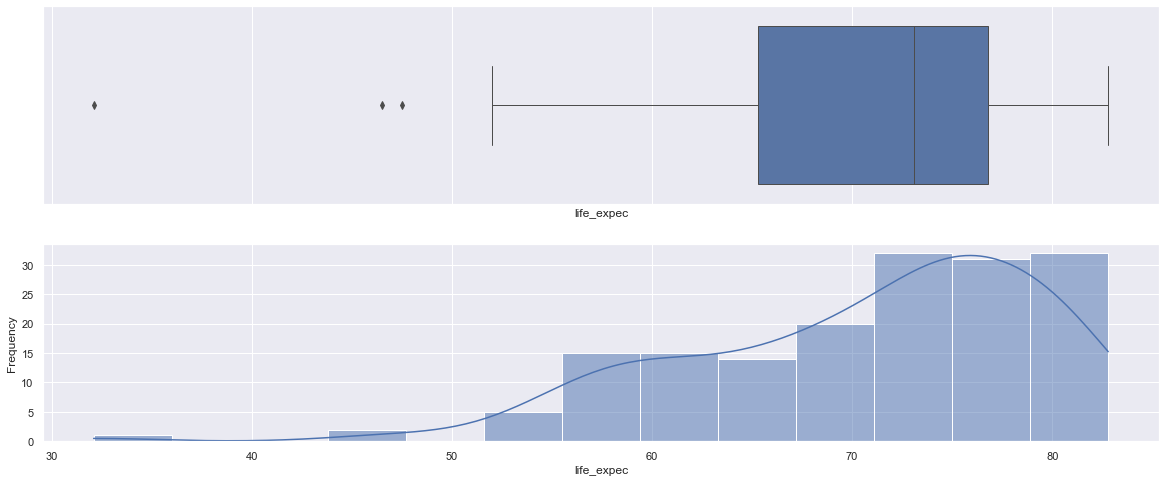

<Figure size 1440x576 with 0 Axes>

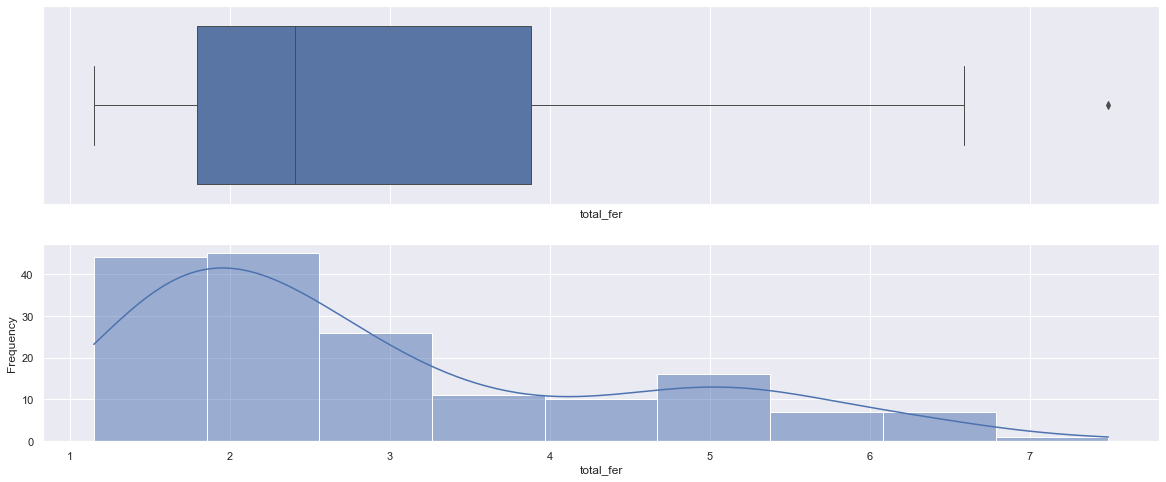

<Figure size 1440x576 with 0 Axes>

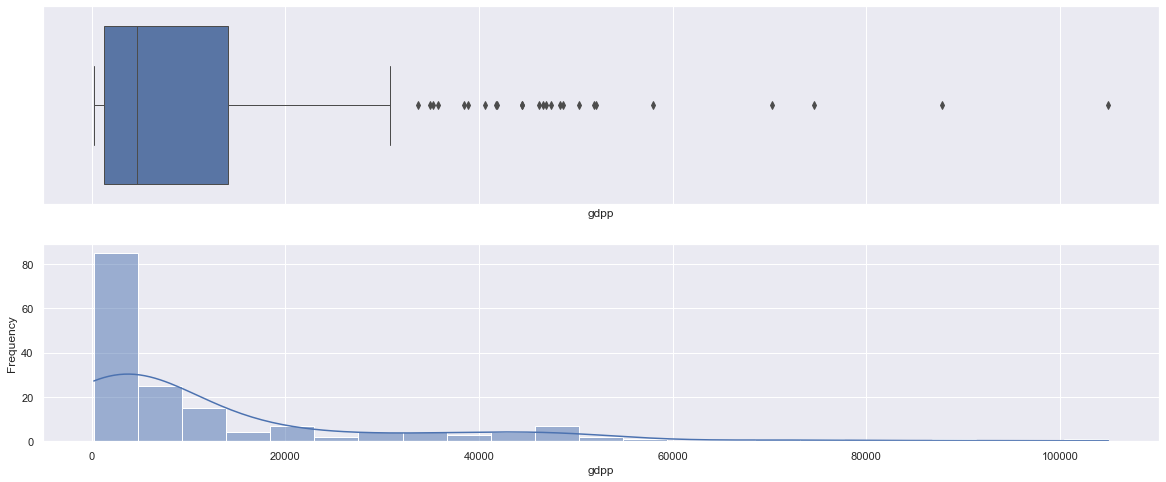

In [242]:
for i in df1.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(20, 8)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df1[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df1[i], ax=ax_hist ,kde=True)
    

In [243]:
#Income, GDPP et Child mortality ont une moyenne supérieure au 50eme centile indiquant un histogramme fortement asymétrique à droite.

#Inflation varie de valeurs négatives à des valeurs positives élevées. Cela suggère qu'il pourrait y avoir des valeurs aberrantes éloignées.

#La plupart des données sont asymétriques à droite, à l'exception de life expectancy qui est asymétrique à droite.

#Il y a deux pics dans le GDPP and total fertility suggérant qu'au moins 2 groupe peuvent être formées dans les données.

#Tous les graphiques suggèrent qu'il y a des valeurs aberrantes..

#Income and GDPP semblent avoir une forte corrélation.

#Tous les pays avec GDPP elevé ont une faible child mortality et un life expectancy elevée et une faible inflation.

#Tous les pays qui ont un income elevé ont un faible child mortality

#il existe une légère corrélation positive entre imports et exports.

#Sauf pour Life Ecpectancy,  toutes les boîtes à moustaches ont des valeurs aberrantes uniquement à l'extrémité supérieure. (Cela concorde avec les observations faites dans le pairplot

#GDPP a beaucoup de valeurs aberrantes positives.

#Inflation a peu de valeurs aberrantes mais une a une valeur très élevée qui affectera la distribution.

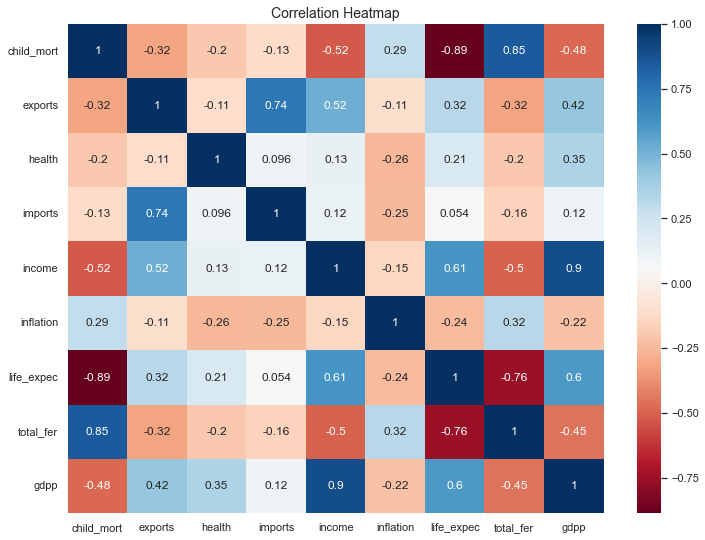

In [244]:
#correlation
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [245]:
#Imports et Exports ont une corrélation positive très élevée. (+0.74)

#Life Expectancy et Child mortality ont une corrélation négative très élevée. (-0.89)

#Total Fertility et child mortality ont une corrélation positive très élevée . (+0.85)

#GDPP and Income ont une corrélation positive très élevée. (+0.9)

#Lifr Expectancy a une corrélation assez élevée avecIncome. (+0.61)

#GDPP a une corrélation assez élevée avec Life Expectancy. (+0.6)

#Total Fertility a une corrélation négative assez élevée avec Life Expectancy. (-0.76)

In [246]:
#Standarisation de Data
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled_MinMax = scaler.fit_transform(df1)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_Standard = scaler.fit_transform(df1)
# define RobustScaler 
scaler = RobustScaler()
# transform data
scaled_Robust = scaler.fit_transform(df1)

In [247]:
scaled_X_MinMax= pd.DataFrame(scaled_MinMax,columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'])
scaled_X_Standard= pd.DataFrame(scaled_Standard,columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'])
scaled_X_Robust= pd.DataFrame(scaled_Robust,columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'])

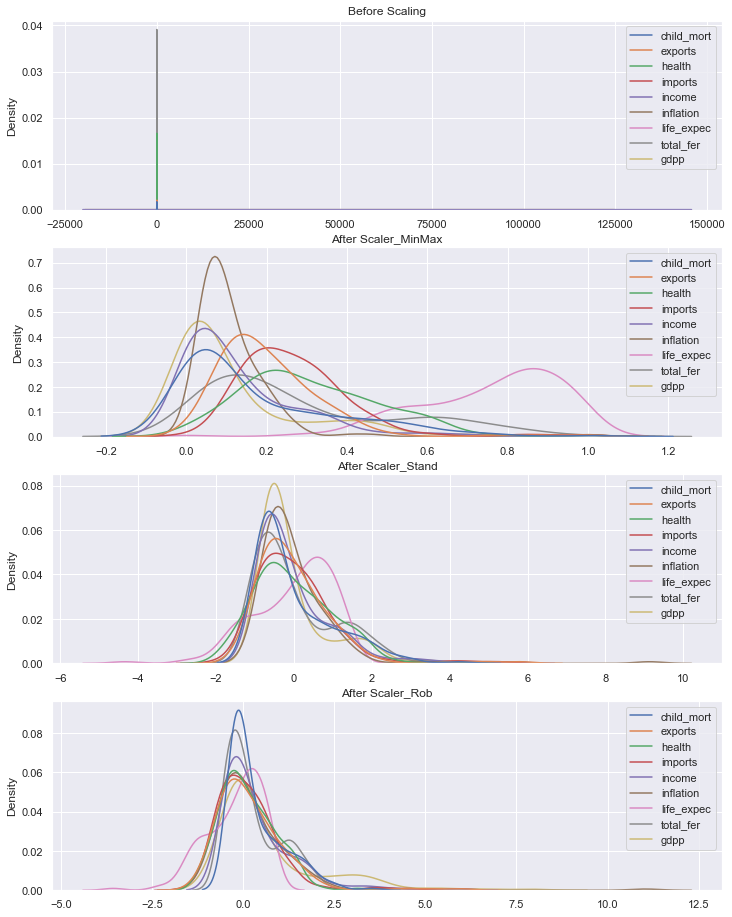

In [248]:
fig , (ob1, ob2, ob3, ob4) = plt.subplots(4,figsize=(12,16))
ob1.set_title('Before Scaling')
sns.kdeplot(data=df1, ax=ob1)
ob2.set_title('After Scaler_MinMax')
sns.kdeplot(data=scaled_X_MinMax, ax=ob2)
ob3.set_title('After Scaler_Stand')
sns.kdeplot(data=scaled_X_Standard, ax=ob3)
ob4.set_title('After Scaler_Rob')
sns.kdeplot(data=scaled_X_Robust, ax=ob4)
plt.show()

In [249]:
#Analyse ACP
acp = PCA(svd_solver='full', n_components=None)

In [250]:
# Transformation
C=acp.fit_transform(scaled_X_Robust)
print(C.round(3))

[[-2.295 -0.075 -0.292 ...  0.162  0.378 -0.259]
 [-0.274 -0.686 -0.41  ...  0.219  0.108  0.21 ]
 [-0.716  0.781  0.039 ... -0.038 -0.026  0.143]
 ...
 [-0.266 -0.475  1.619 ...  0.012 -0.208  0.109]
 [-1.878  1.393  0.292 ...  0.056  0.046 -0.108]
 [-2.18   0.521  0.347 ... -0.355 -0.239 -0.602]]


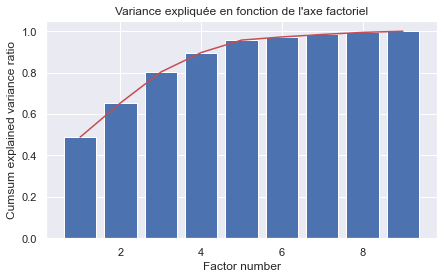

In [251]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(7,4))
plt.plot(np.arange(1,K),np.cumsum(acp.explained_variance_ratio_), color='r')
plt.bar(np.arange(1,K),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée en fonction de l'axe factoriel")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [252]:
#La variance couverte diminue après la 4ème valeur propre. Il couvre plus de 90% de la variance. On va donc utiliser ces 4 valeurs à l'avenir

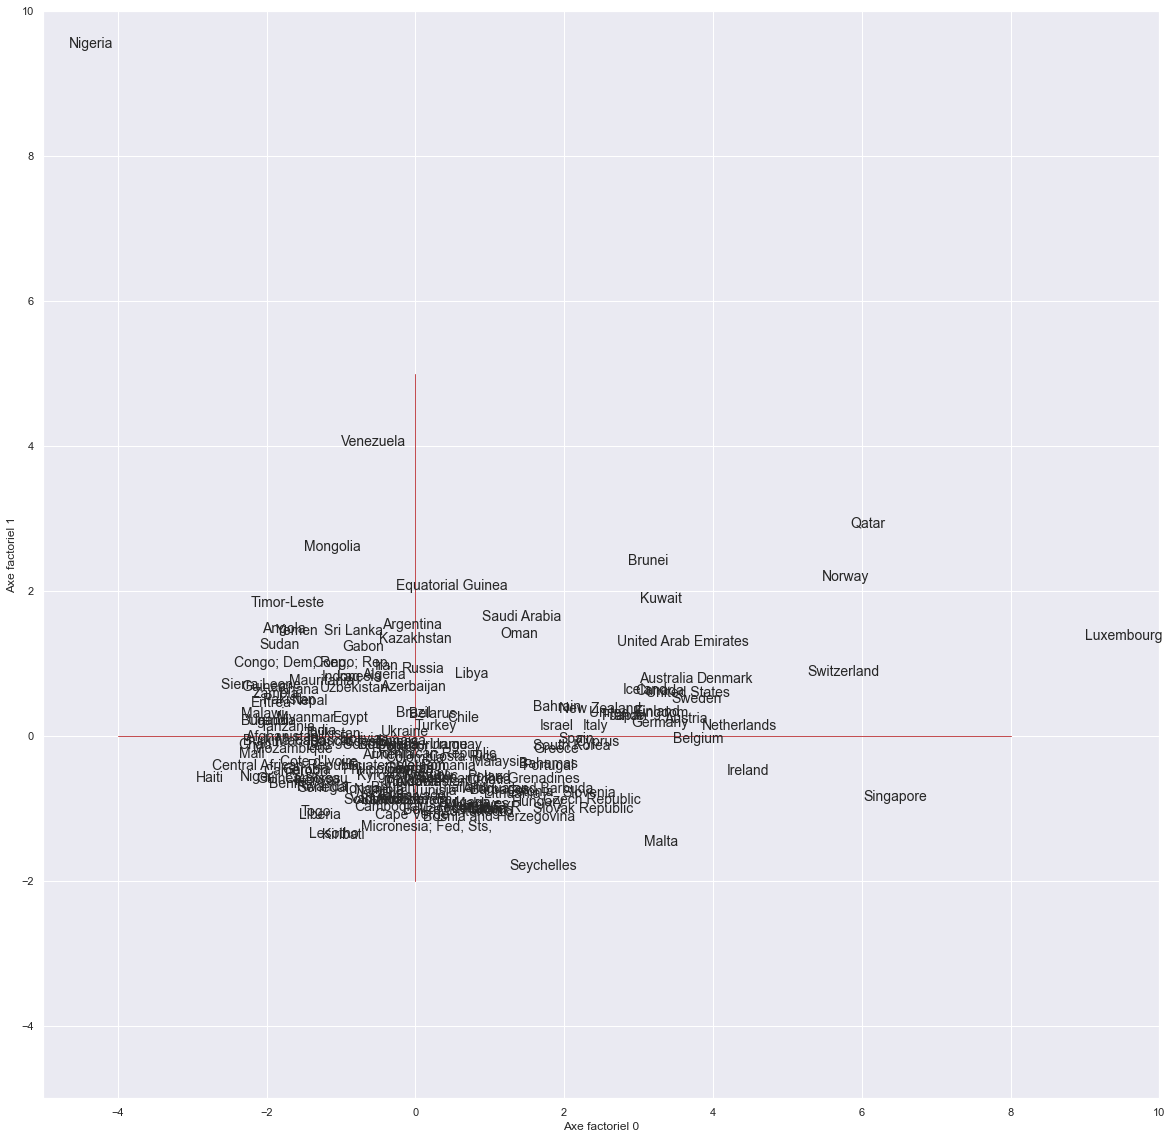

In [253]:
#Représentation des observations
#positionnement des individus dans le premier plan Axe factoriel 0 Axe factoriel 1
df2 = df.set_index(['country'])
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-5,10) #limites en abscisse
axes.set_ylim(-5,10) #limites en ordonnée
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,0],C[i,1]))
#ajouter les axes
plt.plot([-4,8],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,5],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 0")
plt.ylabel("Axe factoriel 1" )
#affichage
plt.show()

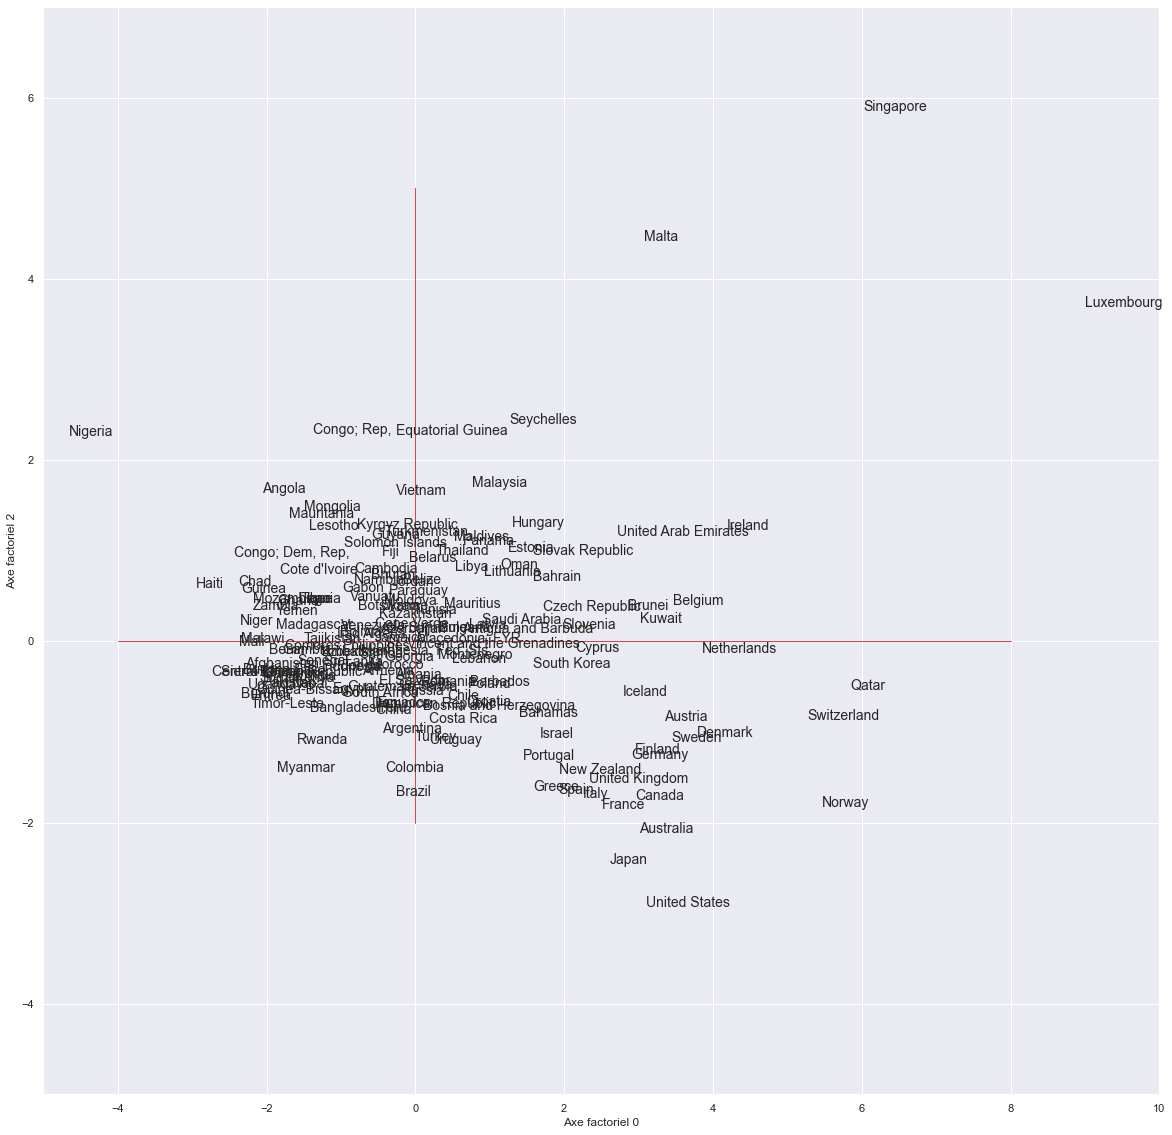

In [254]:
#Représentation des observations
#positionnement des individus dans le 2eme plan Axe factoriel 0 Axe factoriel 2
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-5,10) 
axes.set_ylim(-5,7) 
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,0],C[i,2]))
#ajouter les axes
plt.plot([-4,8],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,5],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 0")
plt.ylabel("Axe factoriel 2" )
#affichage
plt.show()

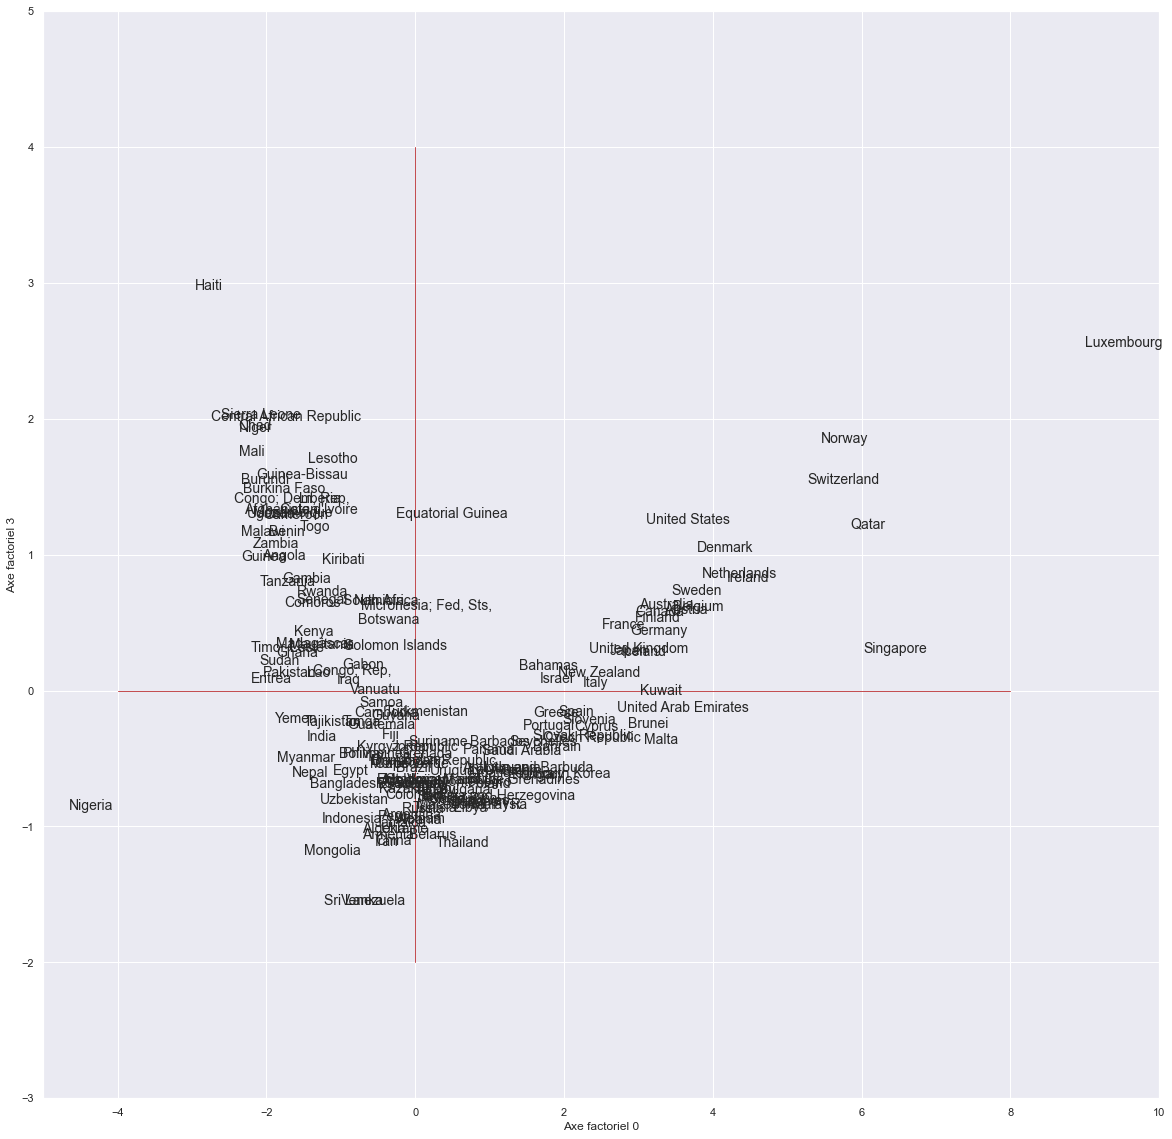

In [255]:
#Représentation des observations
#positionnement des individus dans le 3eme plan Axe factoriel 0 Axe factoriel 3
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-5,10) 
axes.set_ylim(-3,5) 
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,0],C[i,3]))
#ajouter les axes
plt.plot([-4,8],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,4],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 0")
plt.ylabel("Axe factoriel 3" )
#affichage
plt.show()

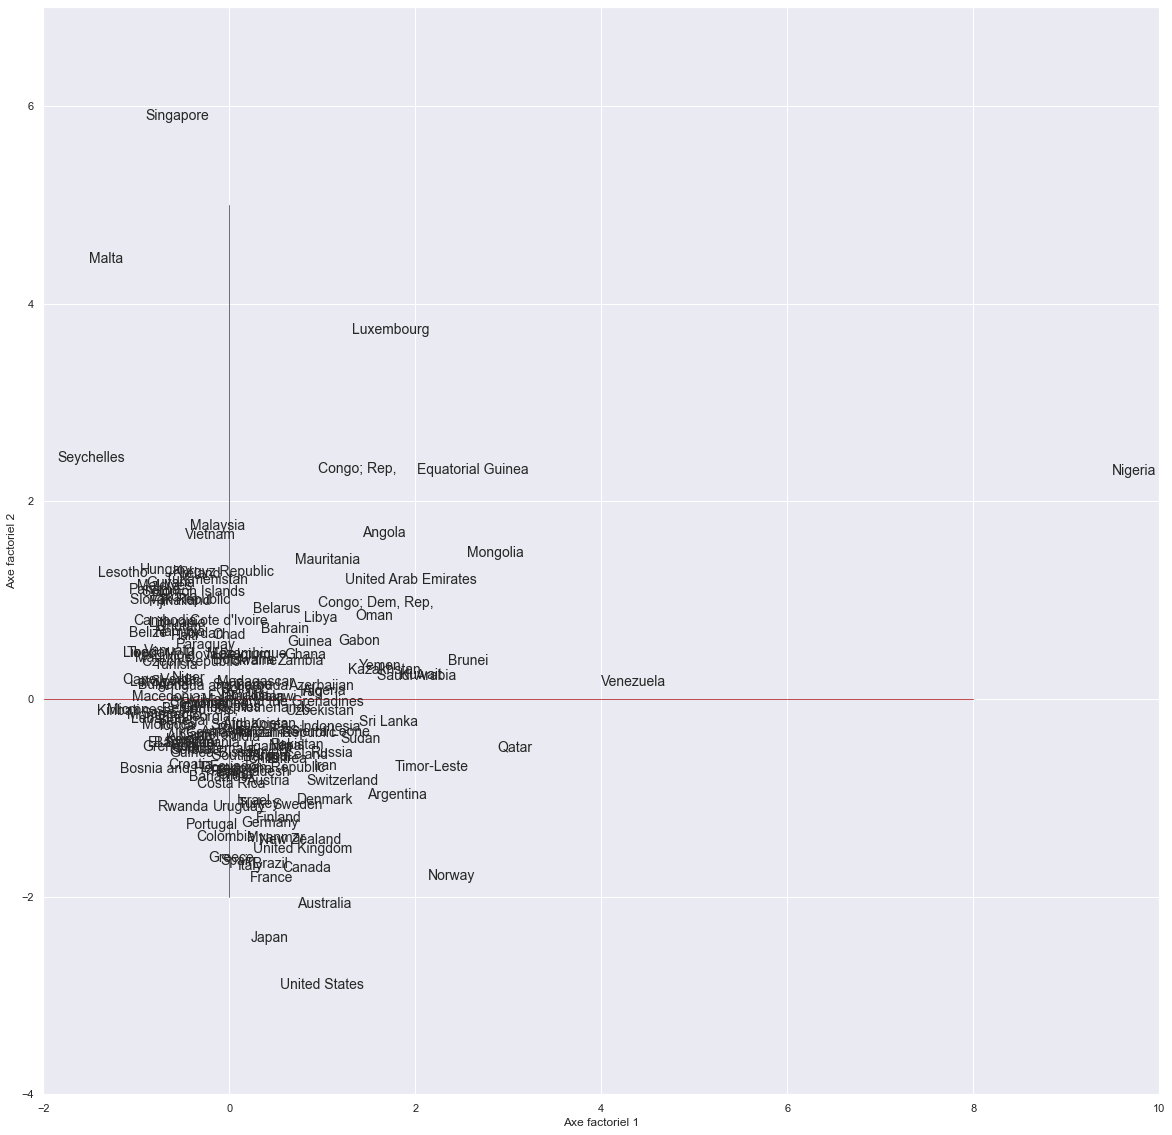

In [256]:
#Représentation des observations
#positionnement des individus dans le 4eme plan Axe factoriel 1 Axe factoriel 2
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-2,10)
axes.set_ylim(-4,7) 
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,1],C[i,2]))
#ajouter les axes
plt.plot([-4,8],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,5],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 1")
plt.ylabel("Axe factoriel 2" )
#affichage
plt.show()

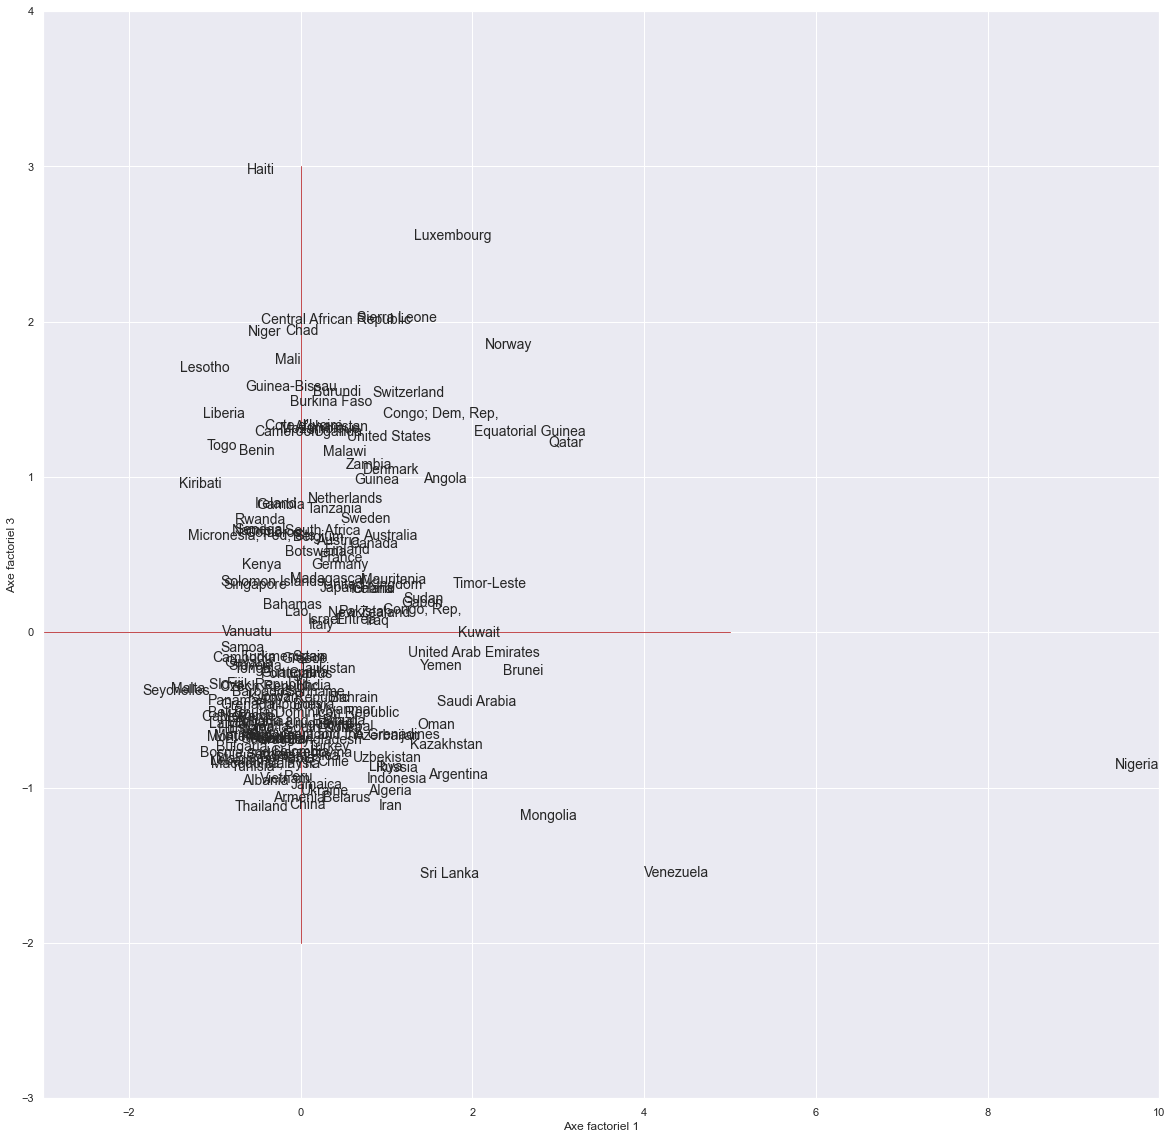

In [257]:
#Représentation des observations
#positionnement des individus dans le 5eme plan Axe factoriel 1 Axe factoriel 3
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-3,10) 
axes.set_ylim(-3,4) 
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,1],C[i,3]))
#ajouter les axes
plt.plot([-3,5],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,3],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 1")
plt.ylabel("Axe factoriel 3" )
#affichage
plt.show()

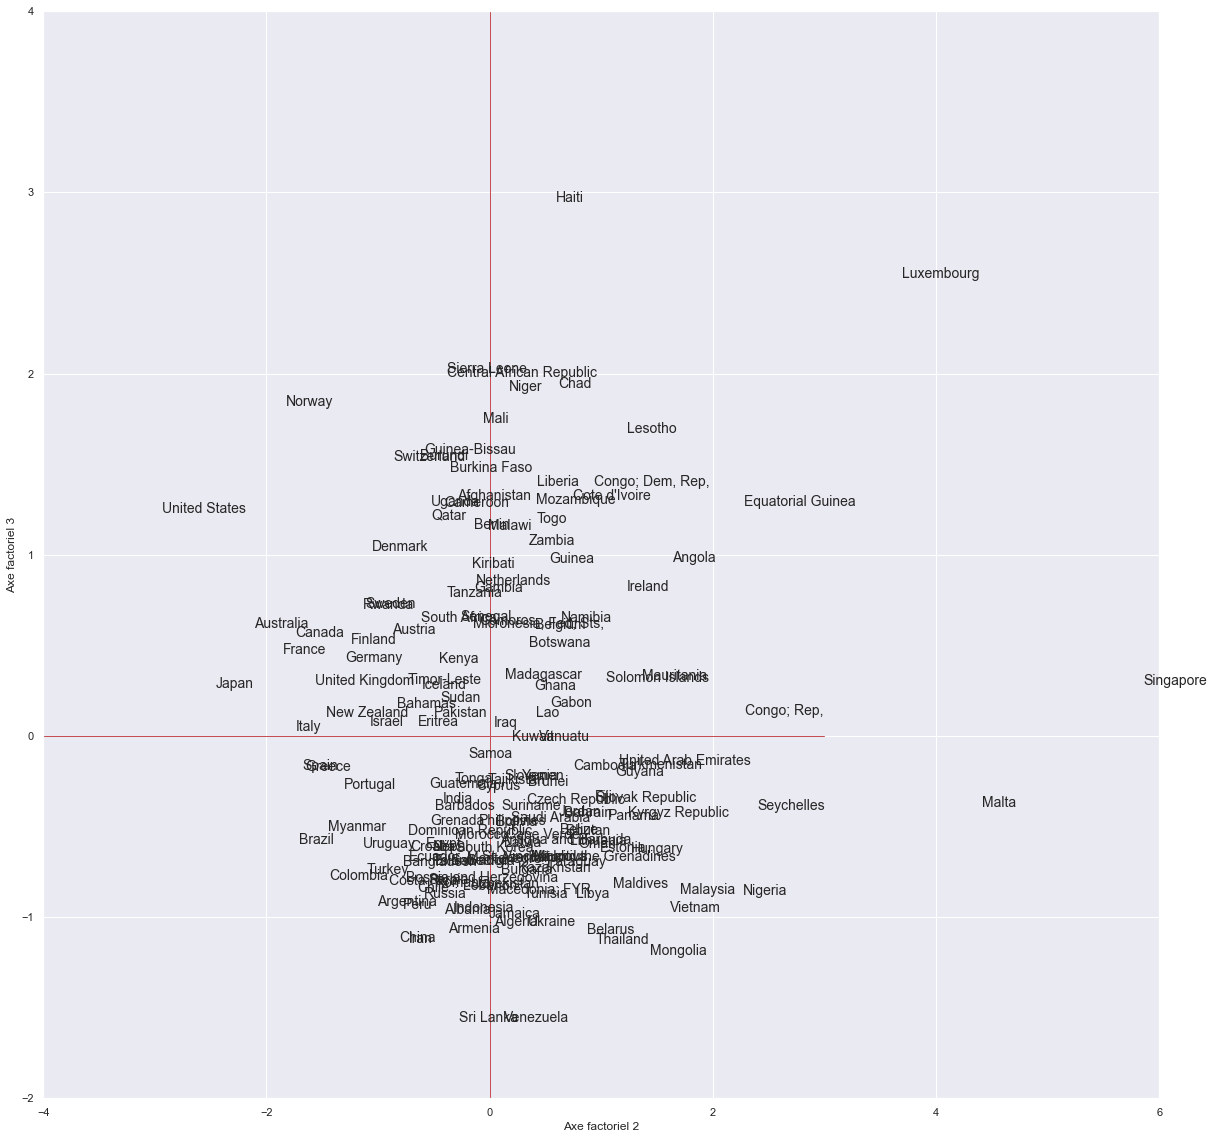

In [258]:
#Représentation des observations
#positionnement des individus dans le 6eme plan Axe factoriel 2 Axe factoriel 3
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-4,6) 
axes.set_ylim(-2,4) 
#placement des étiquettes des observations
for i in range(N):
    plt.annotate(df2.index[i],(C[i,2],C[i,3]))
#ajouter les axes
plt.plot([-4,3],[0,0],color='r',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,4],color='r',linestyle='-',linewidth=1)
plt.xlabel("Axe factoriel 2")
plt.ylabel("Axe factoriel 3" )
#affichage
plt.show()

In [259]:
#Les 4 premier composantes explique 90% de la vriance des données 
#Une réduction de dimensions initiale permet de représenter les individus avec quelle perte de différentiation (perte de variance) ?
pca = PCA(n_components = 4,svd_solver = "full")
coord_pca = pca.fit_transform(scaled_X_Robust)
print("variances expliquées:")
print(["%0.2f" % i for i in pca.explained_variance_ratio_])

variances expliquées:
['0.49', '0.17', '0.15', '0.09']


In [260]:
pcaData = pd.DataFrame(coord_pca)
pcaData.head()

0         1         2         3
0 -2.294559 -0.075365 -0.291972  1.299940
1 -0.274220 -0.685631 -0.410398 -0.979856
2 -0.716441  0.781060  0.038956 -1.048829
3 -2.059689  1.424454  1.636721  0.961193
4  0.630218 -0.781486  0.088919 -0.596073

In [261]:
#Contribution des individus à chaque axe factoriel
#Matrice de correlation et matrice de covariance
corr_matrix = np.corrcoef(scaled_X_Robust.transpose())
print("La matrice de corrélation: \n", corr_matrix.round(2))
print("##################################################################")
print("##################################################################")
cov_matrix = np.cov(scaled_X_Robust.transpose())
print("La matrice de covariance: \n", cov_matrix.round(2))
print("##################################################################")
print("##################################################################")
eigval, vectors = np.linalg.eig(cov_matrix)
print('Les valeurs propres sont:', '\n', eigval.round(3), '\n')
print('Les vecteurs propres sont:', '\n', vectors.round(3))
print("Les vecteurs propres sont données par la matrice précédente. (Les vecteurs colonnes)")
print("##################################################################")
print("##################################################################")
ctr = coord_pca**2
for j in range(4):
    ctr[:,j] = ctr[:,j]/(N*eigval[j])
print(pd.DataFrame({'id':df2.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]}))

La matrice de corrélation: 
 [[ 1.   -0.32 -0.2  -0.13 -0.52  0.29 -0.89  0.85 -0.48]
 [-0.32  1.   -0.11  0.74  0.52 -0.11  0.32 -0.32  0.42]
 [-0.2  -0.11  1.    0.1   0.13 -0.26  0.21 -0.2   0.35]
 [-0.13  0.74  0.1   1.    0.12 -0.25  0.05 -0.16  0.12]
 [-0.52  0.52  0.13  0.12  1.   -0.15  0.61 -0.5   0.9 ]
 [ 0.29 -0.11 -0.26 -0.25 -0.15  1.   -0.24  0.32 -0.22]
 [-0.89  0.32  0.21  0.05  0.61 -0.24  1.   -0.76  0.6 ]
 [ 0.85 -0.32 -0.2  -0.16 -0.5   0.32 -0.76  1.   -0.45]
 [-0.48  0.42  0.35  0.12  0.9  -0.22  0.6  -0.45  1.  ]]
##################################################################
##################################################################
La matrice de covariance: 
 [[ 0.56 -0.24 -0.11 -0.08 -0.39  0.26 -0.51  0.46 -0.52]
 [-0.24  0.99 -0.08  0.62  0.51 -0.13  0.24 -0.23  0.6 ]
 [-0.11 -0.08  0.56  0.06  0.1  -0.23  0.12 -0.11  0.37]
 [-0.08  0.62  0.06  0.72  0.1  -0.25  0.04 -0.1   0.14]
 [-0.39  0.51  0.1   0.1   0.98 -0.17  0.47 -0.36  1.28]
 [ 0.26 -0

In [262]:
X=pd.DataFrame({'id':df2.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3]})

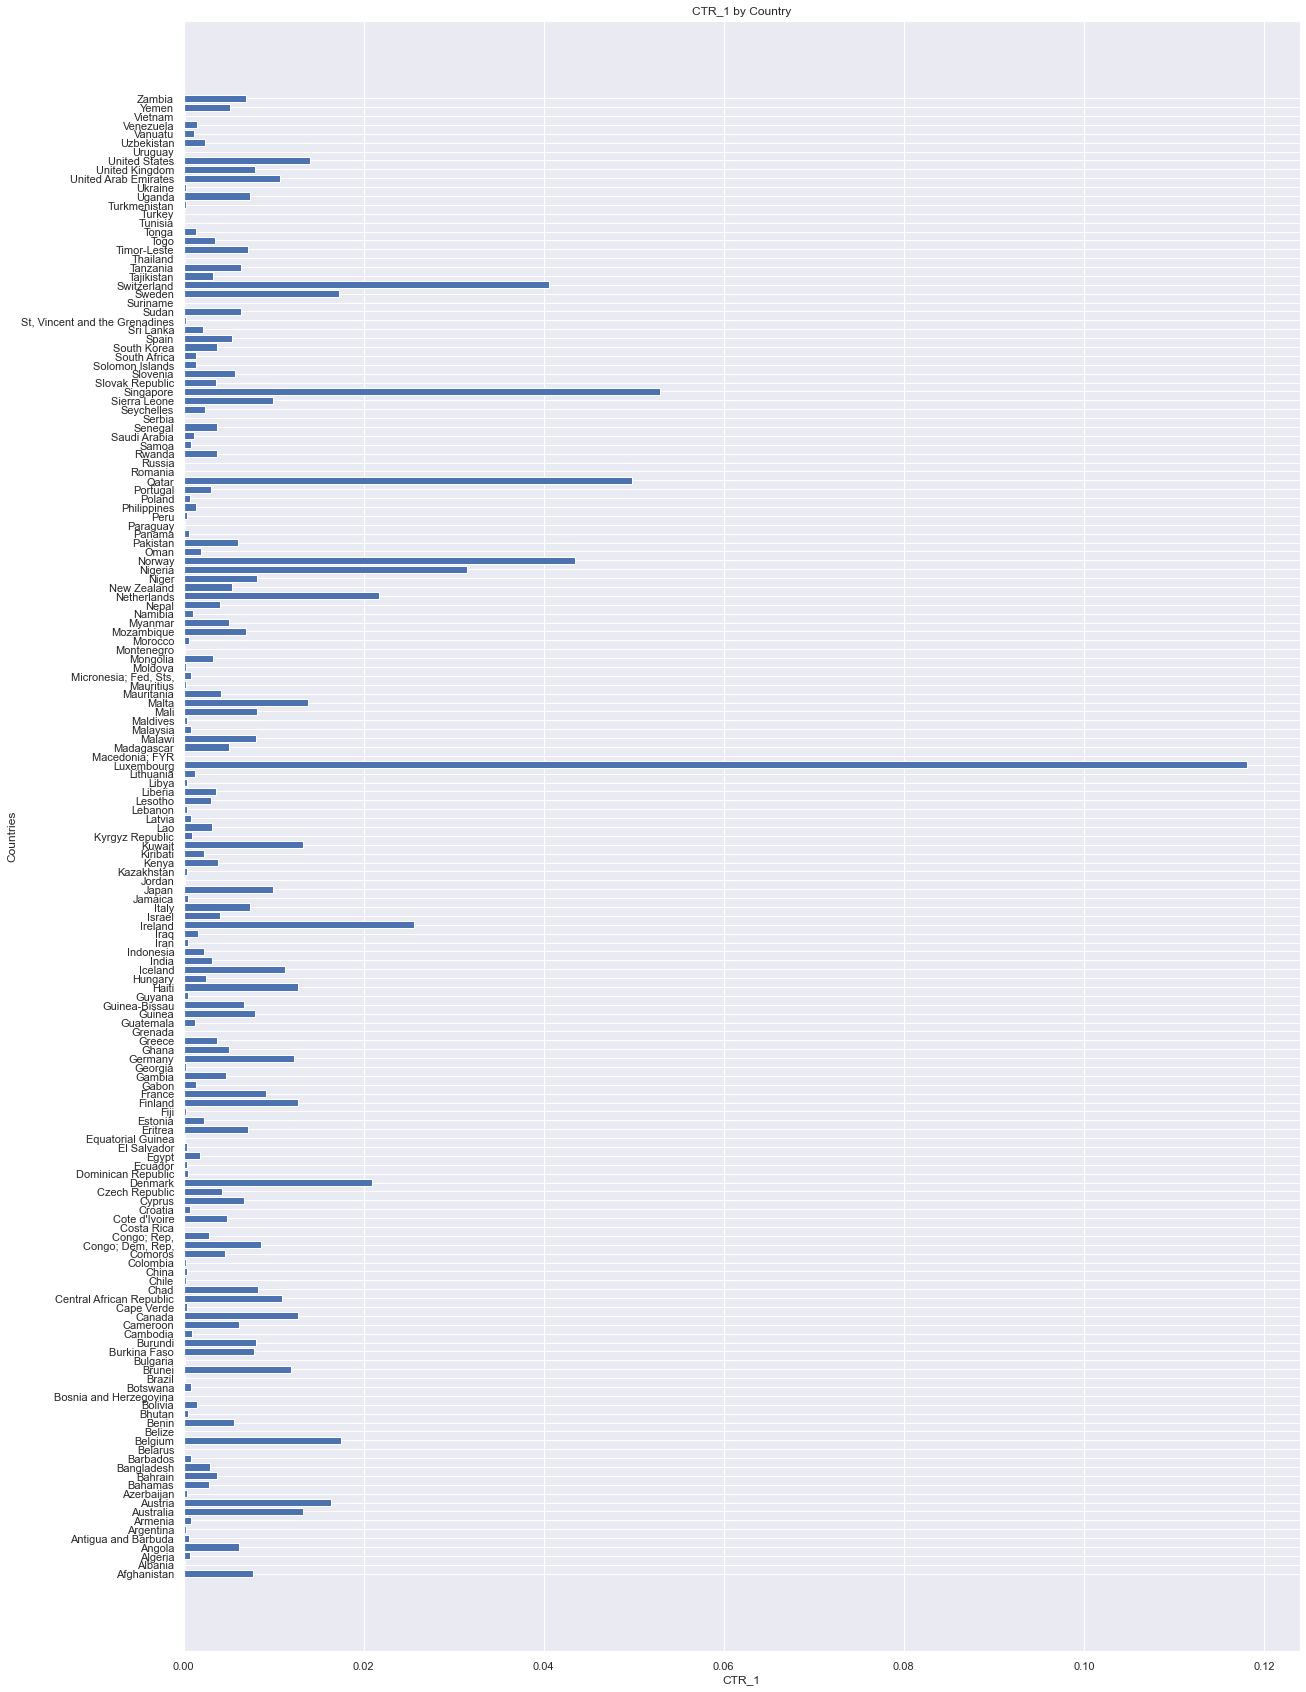

In [263]:
#Contribution des individus à chaque axe factoriel 1
plt.figure(figsize=[20, 30])
plt.barh(X['id'], X['CTR_1'], label = "CTR_1")
plt.xlabel('CTR_1')
plt.ylabel('Countries')
plt.title('CTR_1 by Country')
plt.show()

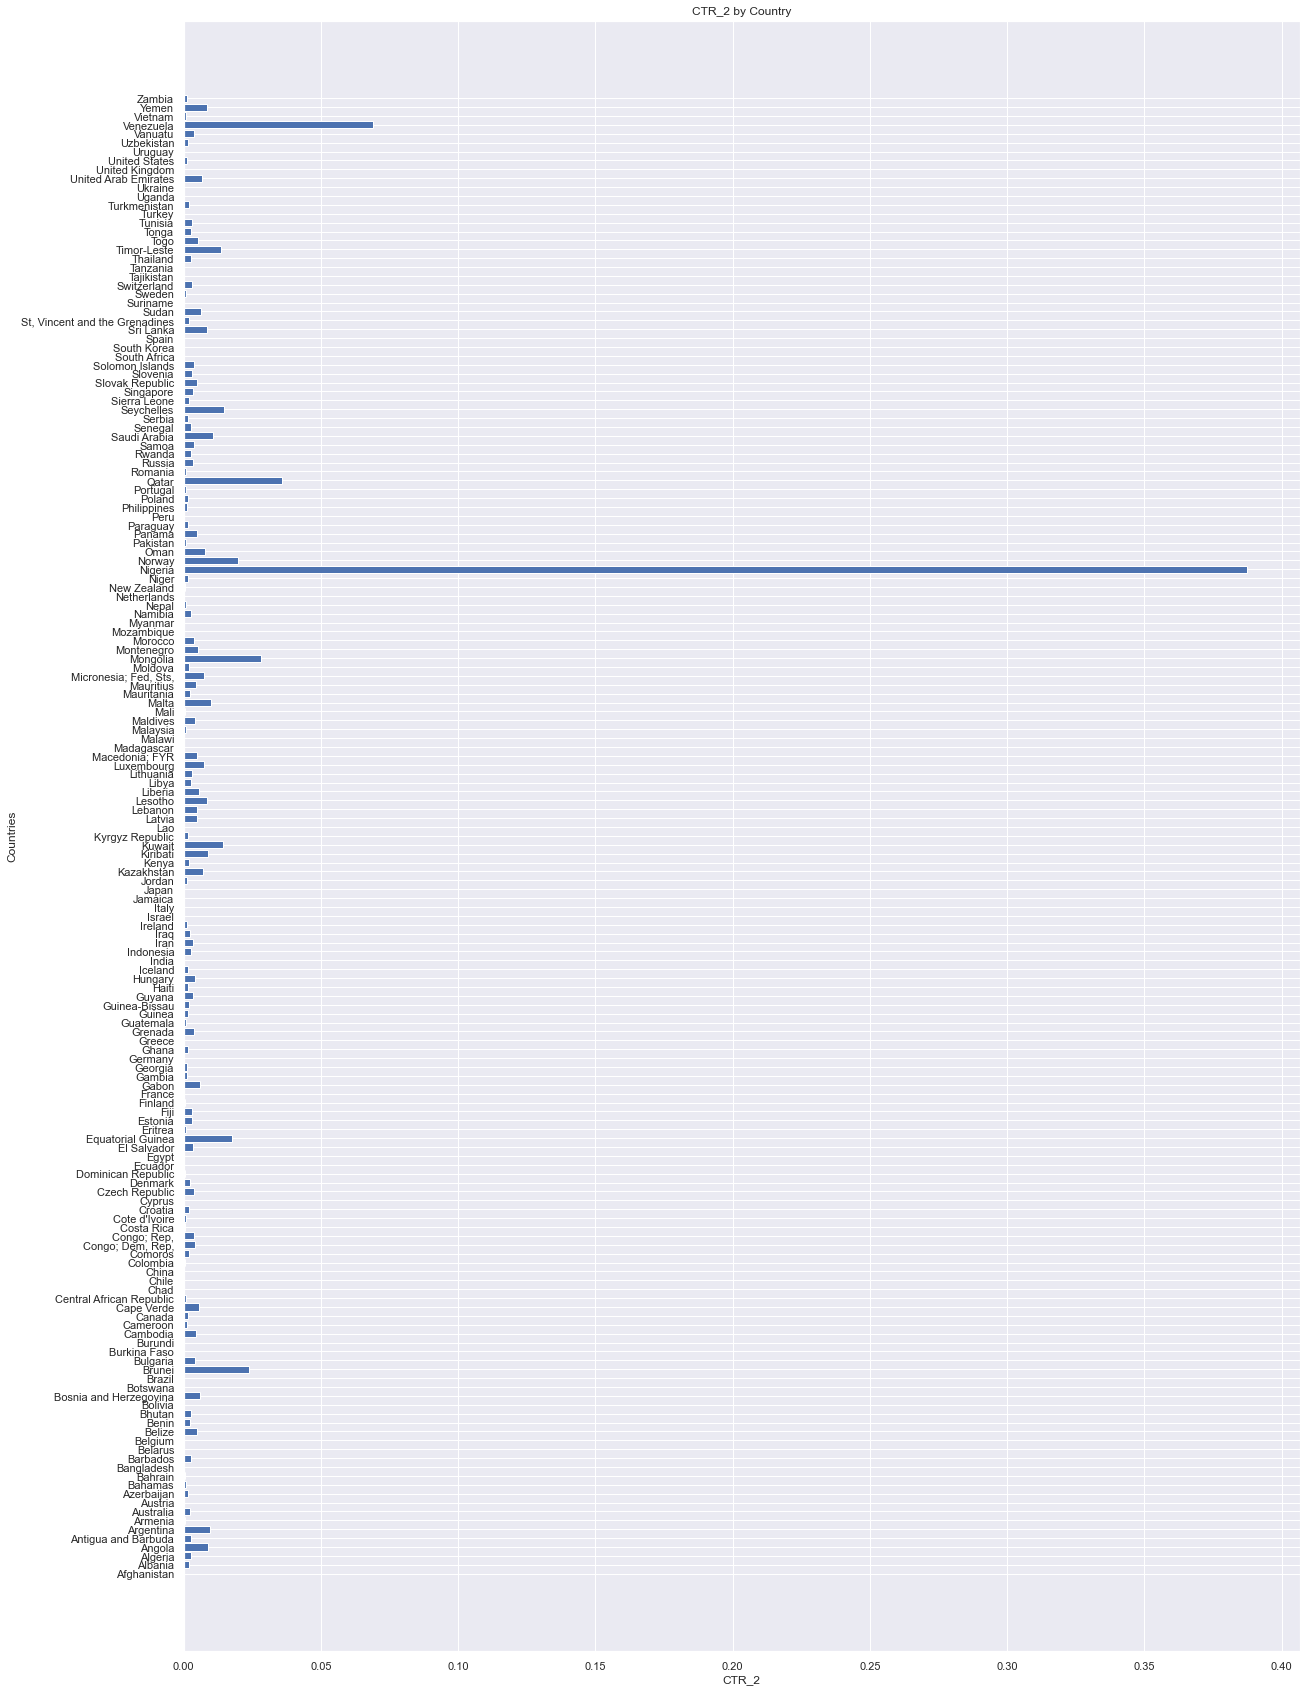

In [264]:
#Contribution des individus à chaque axe factoriel 2
plt.figure(figsize=[20, 30])
plt.barh(X['id'], X['CTR_2'], label = "CTR_2")
plt.xlabel('CTR_2')
plt.ylabel('Countries')
plt.title('CTR_2 by Country')
plt.show()

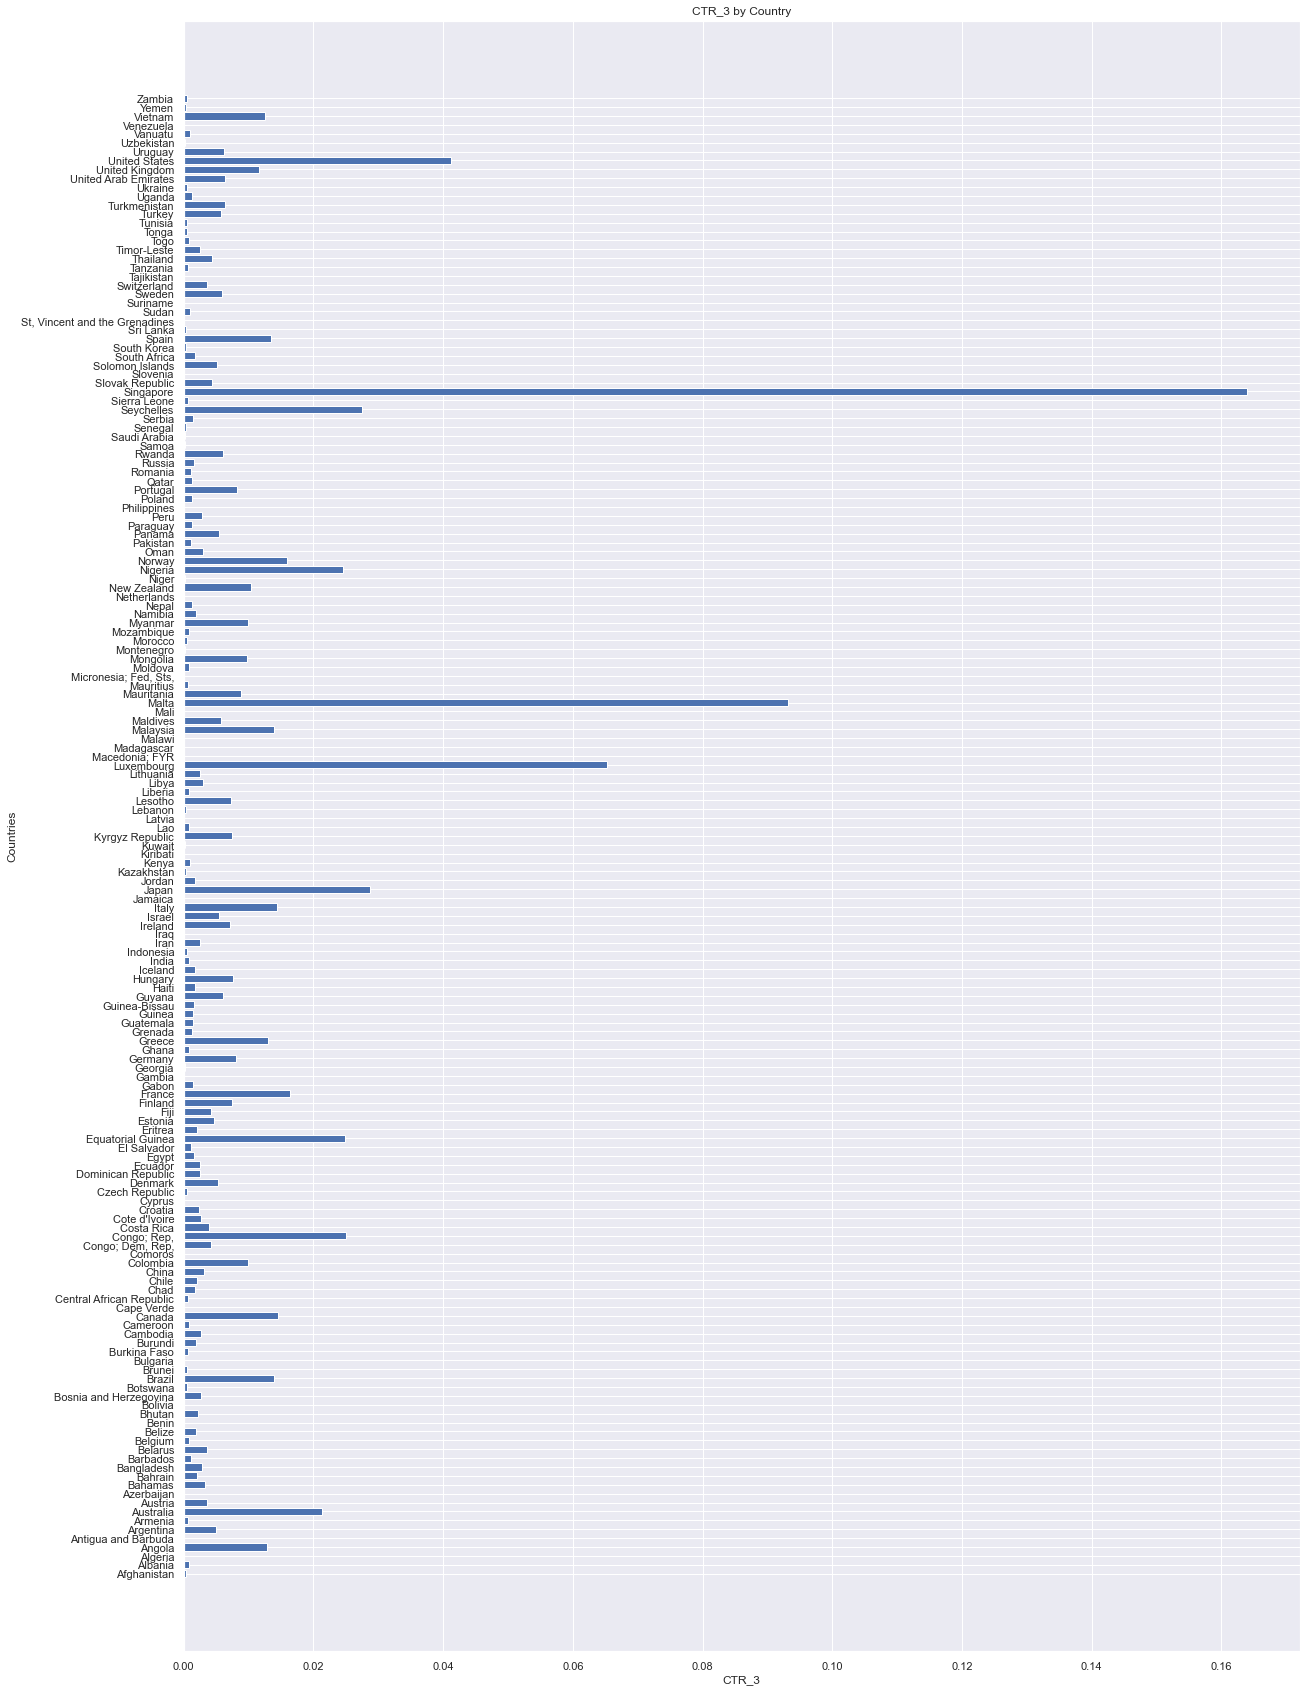

In [265]:
#Contribution des individus à chaque axe factoriel 3
plt.figure(figsize=[20, 30])
plt.barh(X['id'], X['CTR_3'], label = "CTR_3")
plt.xlabel('CTR_3')
plt.ylabel('Countries')
plt.title('CTR_3 by Country')
plt.show()

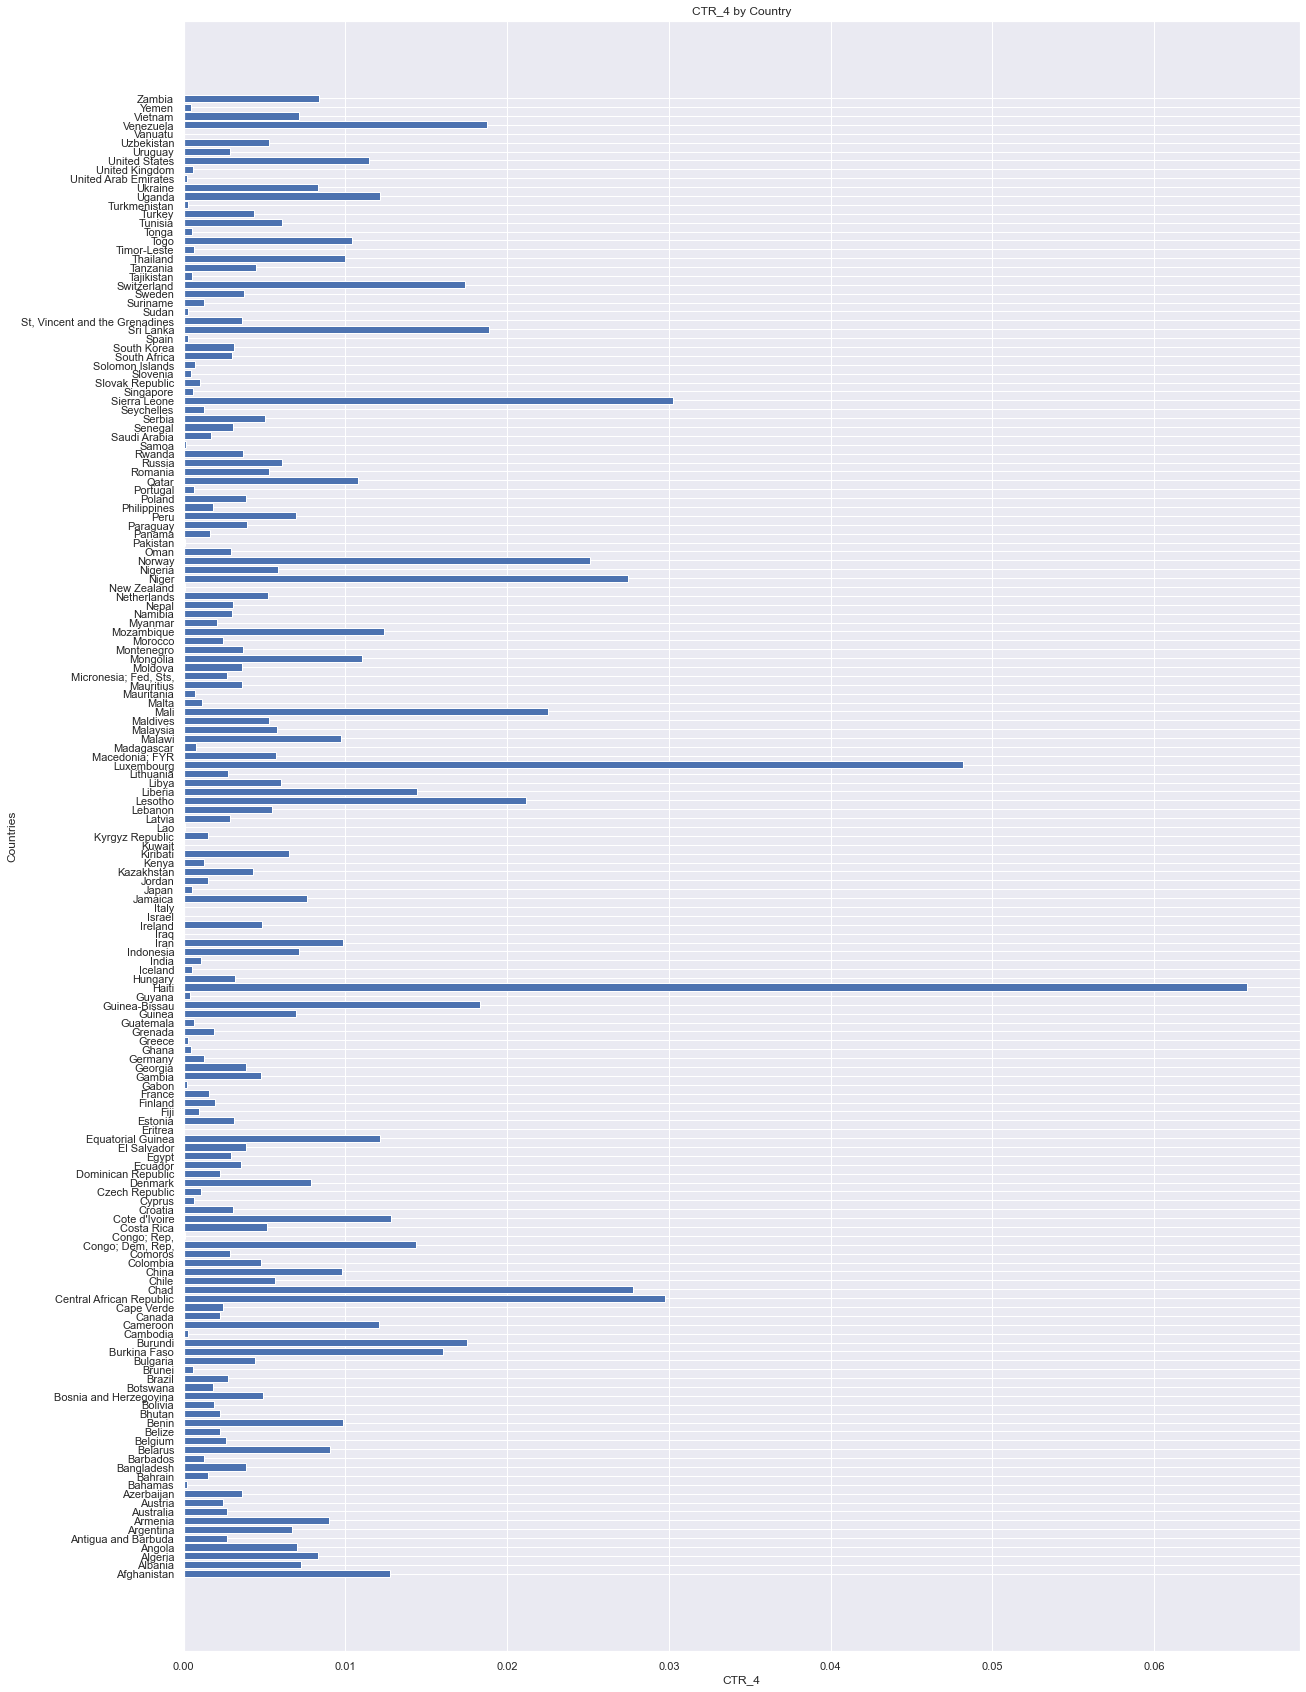

In [34]:
#Contribution des individus à chaque axe factoriel 4
plt.figure(figsize=[20, 30])
plt.barh(X['id'], X['CTR_4'], label = "CTR_4")
plt.xlabel('CTR_4')
plt.ylabel('Countries')
plt.title('CTR_4 by Country')
plt.show()

In [35]:
#Haiti Luxembourg Malta Singapore Nigeria

In [36]:
df.describe().round(2)

child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89   17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21   19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07     609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20    3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30    9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75   22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00  125000.00     104.00       82.80   

       total_fer       gdpp  
count     167.00     167.00  
mean        2.95   12964.16  
std         1.51   18328.70  
min         1.15     231.00  
25%         1.80    1330.00  
50%         2.41    4660.00  
75%         3.88   14050.00  
max         7.49  105000.00

In [37]:
df2.loc[['Haiti','Luxembourg','Malta','Singapore','Nigeria'],['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

child_mort  exports  health  imports  income  inflation  \
country                                                               
Haiti            208.0     15.3    6.91     64.7    1500      5.450   
Luxembourg         2.8    175.0    7.77    142.0   91700      3.620   
Malta              6.8    153.0    8.65    154.0   28300      3.830   
Singapore          2.8    200.0    3.96    174.0   72100     -0.046   
Nigeria          130.0     25.3    5.07     17.4    5150    104.000   

            life_expec  total_fer    gdpp  
country                                    
Haiti             32.1       3.33     662  
Luxembourg        81.3       1.63  105000  
Malta             80.3       1.36   21100  
Singapore         82.7       1.15   46600  
Nigeria           60.5       5.84    2330

In [38]:
# la CAH
#générer la matrice des liens avec coord_pca
Z = linkage(coord_pca,method='ward',metric='euclidean')
c, coph_dists = cophenet(Z, pdist(coord_pca))
c

0.5896596079454992

In [39]:
#Hirarchical Clustering avec scaled_X_Robust
link = linkage(scaled_X_Robust, metric = 'euclidean', method = 'ward')
c, coph_dist = cophenet(link, pdist(scaled_X_Robust))
c

0.5667192997745153

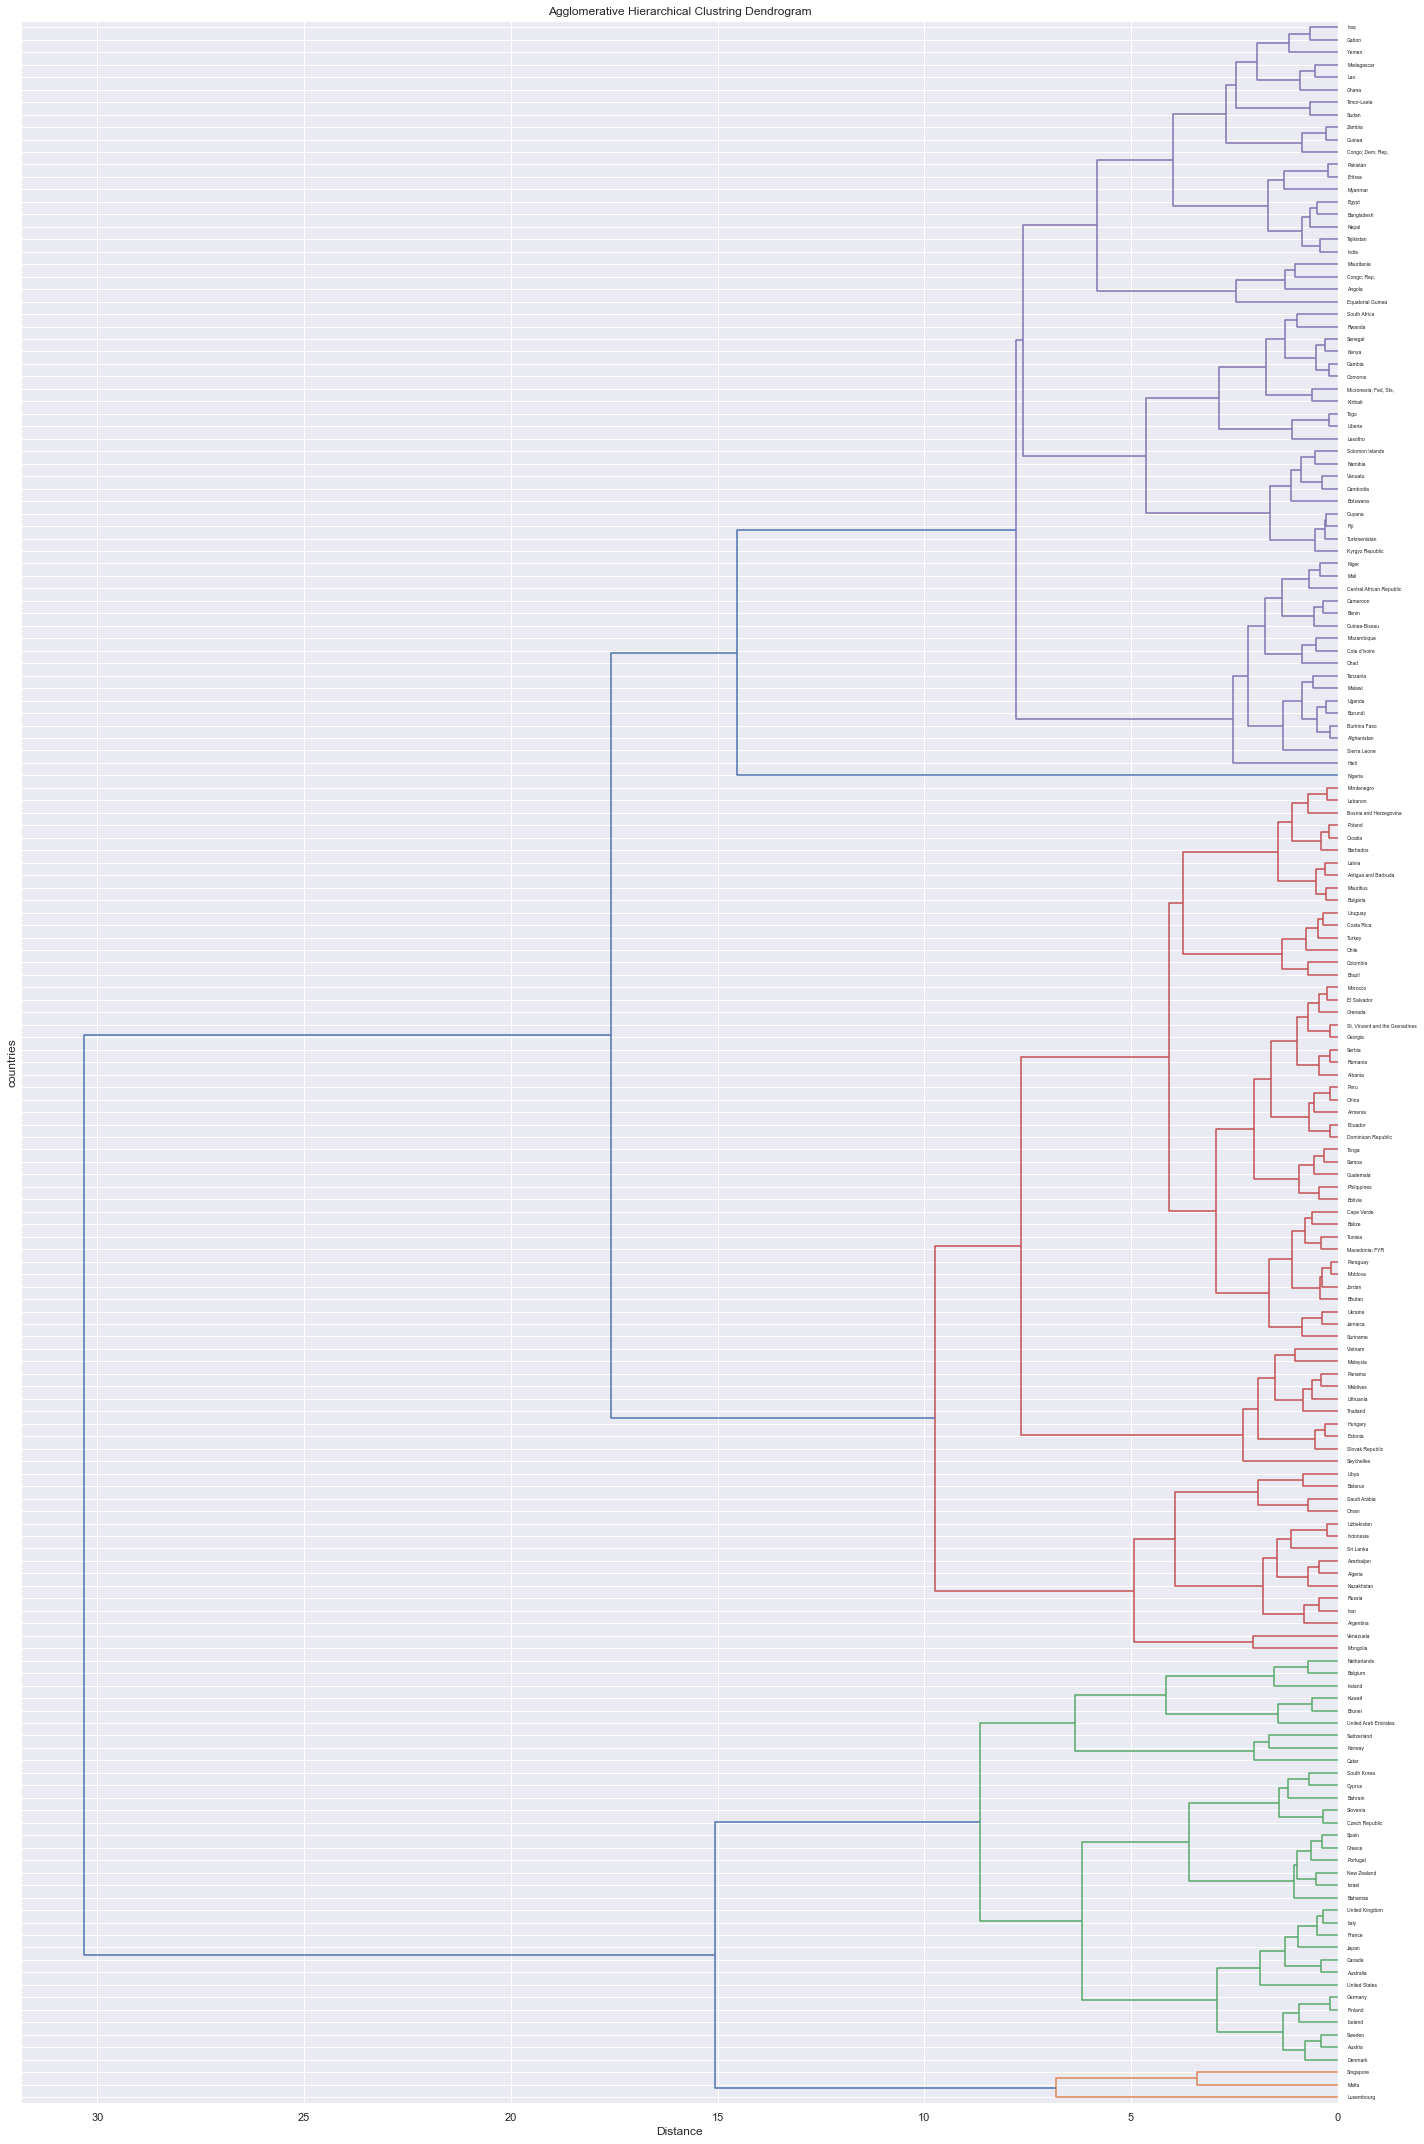

In [40]:
plt.figure(figsize = (20,30))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.ylabel('countries')
plt.xlabel('Distance')
dendrogram(Z,labels=df2.index,orientation='left',color_threshold=12)
plt.tight_layout()

In [41]:
modelAGC = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(coord_pca)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
2     70    41.92
0     61    36.53
1     33    19.76
3      3     1.80


In [43]:
labels=modelAGC.labels_
score=silhouette_score(coord_pca,labels)
score.round(3)

0.305

In [44]:
modelAGC = agc(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(scaled_X_Robust)
sPredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' : sPredAGC.value_counts(), 
                 'percent' : round(sPredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
2     92    55.09
0     38    22.75
1     34    20.36
3      3     1.80


In [45]:
labels=modelAGC.labels_
score=silhouette_score(scaled_X_Robust,labels)
score.round(3)

0.276

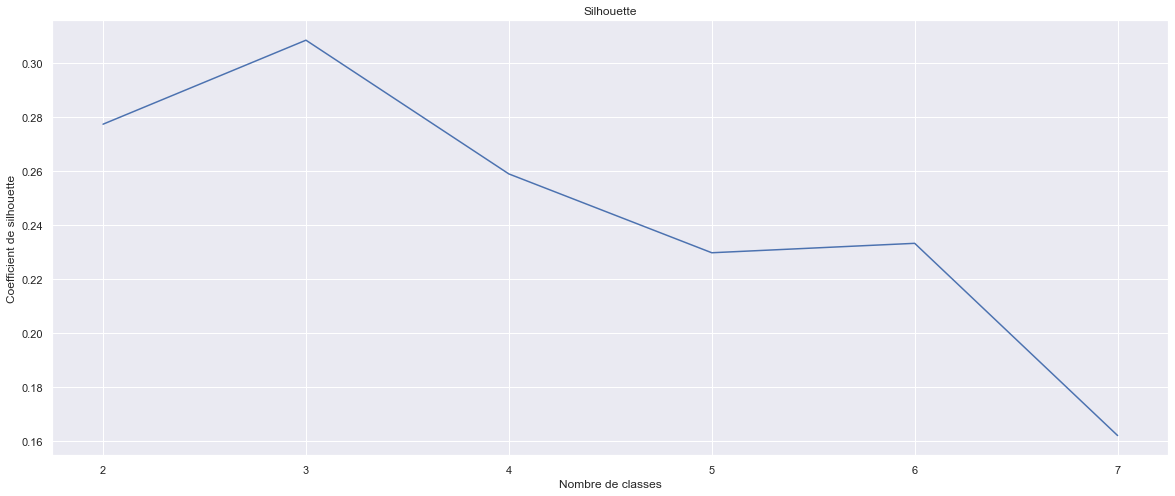

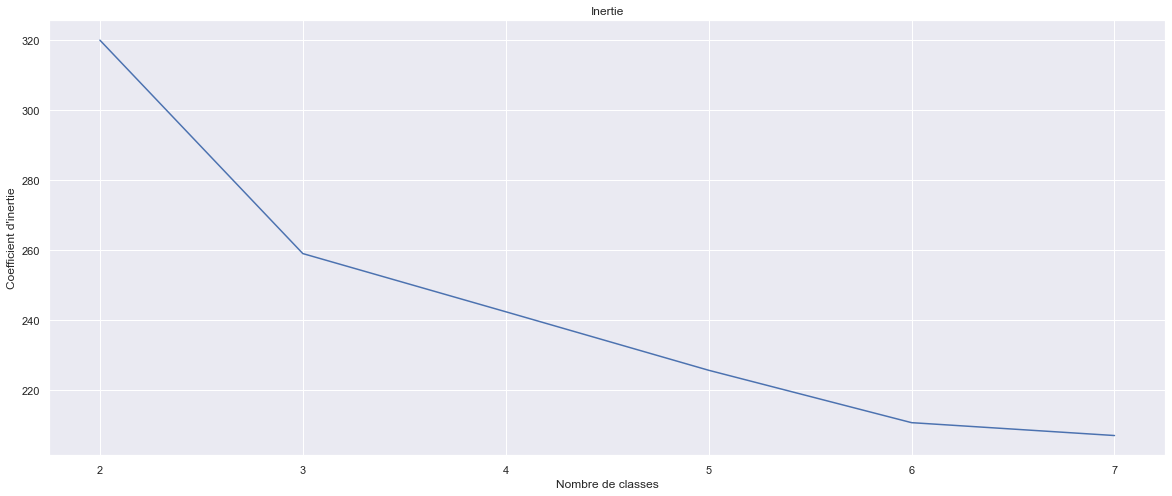

In [65]:
#KMedoids
import sklearn_extra 
from sklearn_extra.cluster import KMedoids
from sklearn import metrics 

res=[] 
wcss=[]

range_n_cluster = range(2,8)
for k in range_n_cluster:   
    km2 = sklearn_extra.cluster.KMedoids(n_clusters=k) 
    km2.fit(coord_pca) 
    Med_pred = km2.fit_predict(coord_pca)
    res.append(metrics.silhouette_score(coord_pca,km2.labels_) )
    wcss.append(km2.inertia_)
    
    
#plot nb. clusters vs. silhouette score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2,8,1),res) 
plt.title("Silhouette")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient de silhouette")
plt.show() 

#plot nb. clusters vs. Inertie score 
import matplotlib.pyplot as plt 
plt.plot(np.arange(2,8,1),wcss) 
plt.title("Inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient d'inertie")
plt.show()

In [66]:
km2.inertia_

207.13680062089202

In [67]:
labels=km2.labels_
score=silhouette_score(coord_pca,labels)
score.round(3)

0.162

In [68]:
#clusters = 3
cluster_count = 3
km2 = sklearn_extra.cluster.KMedoids(n_clusters=cluster_count) 
km2.fit(coord_pca)
pcaPredKM2 = pd.Series(km2.labels_)
print(pd.concat({
    "count" : pcaPredKM2.value_counts(), 
    "Percent" : round(pcaPredKM2.value_counts(normalize = True)*100, 2)}, axis = 1))

   count  Percent
2     74    44.31
1     55    32.93
0     38    22.75


In [69]:
km2.inertia_

259.0220661809281

In [70]:
labels=km2.labels_
score=silhouette_score(coord_pca,labels)
score.round(3)

0.308

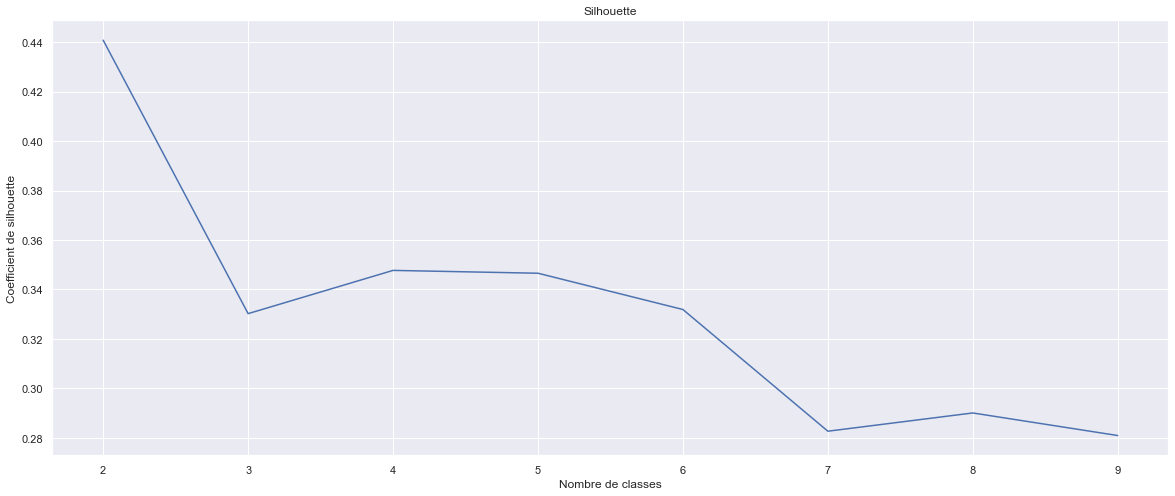

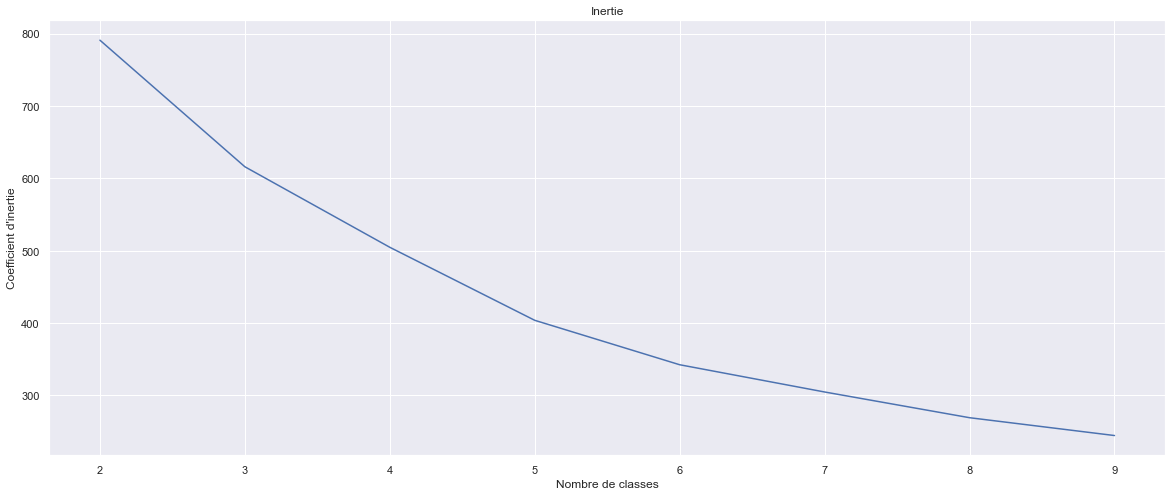

In [71]:
#Clustering

res=[] 
wcss=[]

nb_max_cluster=10

range_n_cluster = range(2, nb_max_cluster)
for k in range_n_cluster:   
    km = KMeans(n_clusters=k, n_init=1000) 
    km.fit(coord_pca) 
    res.append(metrics.silhouette_score(coord_pca,km.labels_) )
    wcss.append(km.inertia_)
    

    
#plot nb. clusters vs. silhouette score 

plt.plot(np.arange(2, nb_max_cluster, 1),res) 
plt.title("Silhouette")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient de silhouette")
plt.show() 

#plot nb. clusters vs. Inertie score 

plt.plot(np.arange(2, nb_max_cluster, 1),wcss) 
plt.title("Inertie")
plt.xlabel("Nombre de classes")
plt.ylabel("Coefficient d'inertie")
plt.show() 

In [72]:
km.inertia_

244.5496302726081

In [73]:
labels=km.labels_
score=silhouette_score(coord_pca,labels)
score.round(3)

0.281

In [134]:
#clusters = 4
cluster_count = 4
modelKM = KMeans(n_clusters = cluster_count , n_init=30, max_iter=500)
modelKM.fit(coord_pca)
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)}, axis = 1))

   count  Percent
0     84    50.30
2     53    31.74
1     27    16.17
3      3     1.80


In [135]:
modelKM.inertia_

504.7690826779551

In [136]:
labels=modelKM.labels_
score=silhouette_score(coord_pca,labels)
score.round(3)

0.348

In [137]:
#le groupe 0 a 50% (~84) de pays dans le dataset.
#le groupe 2 a 32% (~53) des pays.
#le groupe 1 a 16% (~27) des pays. 
#le groupe 3 a 1.8% (3) des pays.
##un groupe de seulement 3 pays semble un peu injustifié. Permet de visualiser les données selon la classification pour déterminer quelles sont les caractéristiques des pays dans chaque groupe.

In [138]:
cluster_labels = modelKM.fit_predict(coord_pca)
cluster_labels

df_clustered=df.copy()
df_clustered["cluster"]=cluster_labels
df_clustered.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp        Class  cluster  
0       9.44        56.2       5.82    553  Undeveloped        0  
1       4.49        76.3       1.65   4090   Developing        1  
2      16.10        76.5       2.89   4460   Developing        1  
3      22.40        60.1       6.16   3530  Undeveloped        0  
4       1.44        76.8       2.13  12200   Developing        1

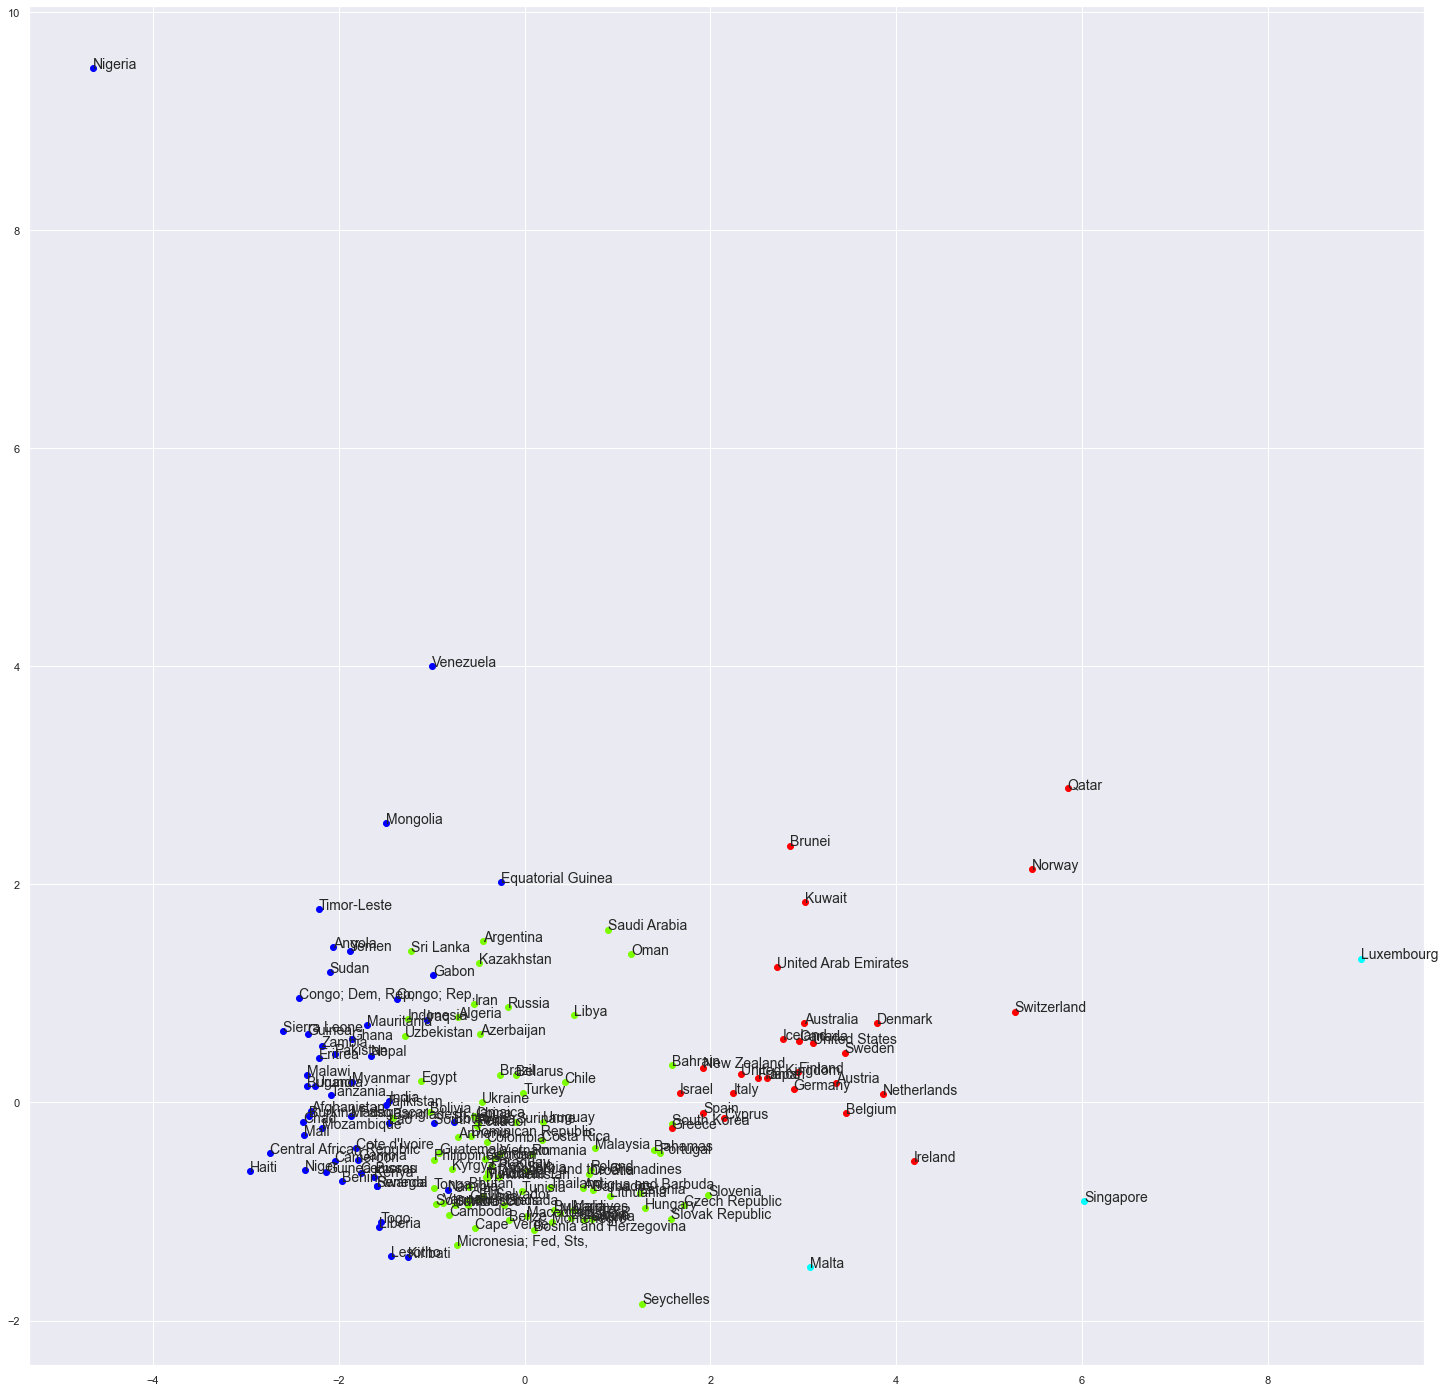

In [139]:
plt.figure(figsize=(25,25))
for couleur,k in zip(['blue','lawngreen','aqua', "red"],range(cluster_count)):
    plt.scatter(coord_pca[df_clustered["cluster"]==k,0],coord_pca[df_clustered["cluster"]==k,1],c=couleur)
    
#mettre les labels des points
for i,label in enumerate(df2.index):
    plt.annotate(label,(coord_pca[i,0],coord_pca[i,1]))
    
plt.show()

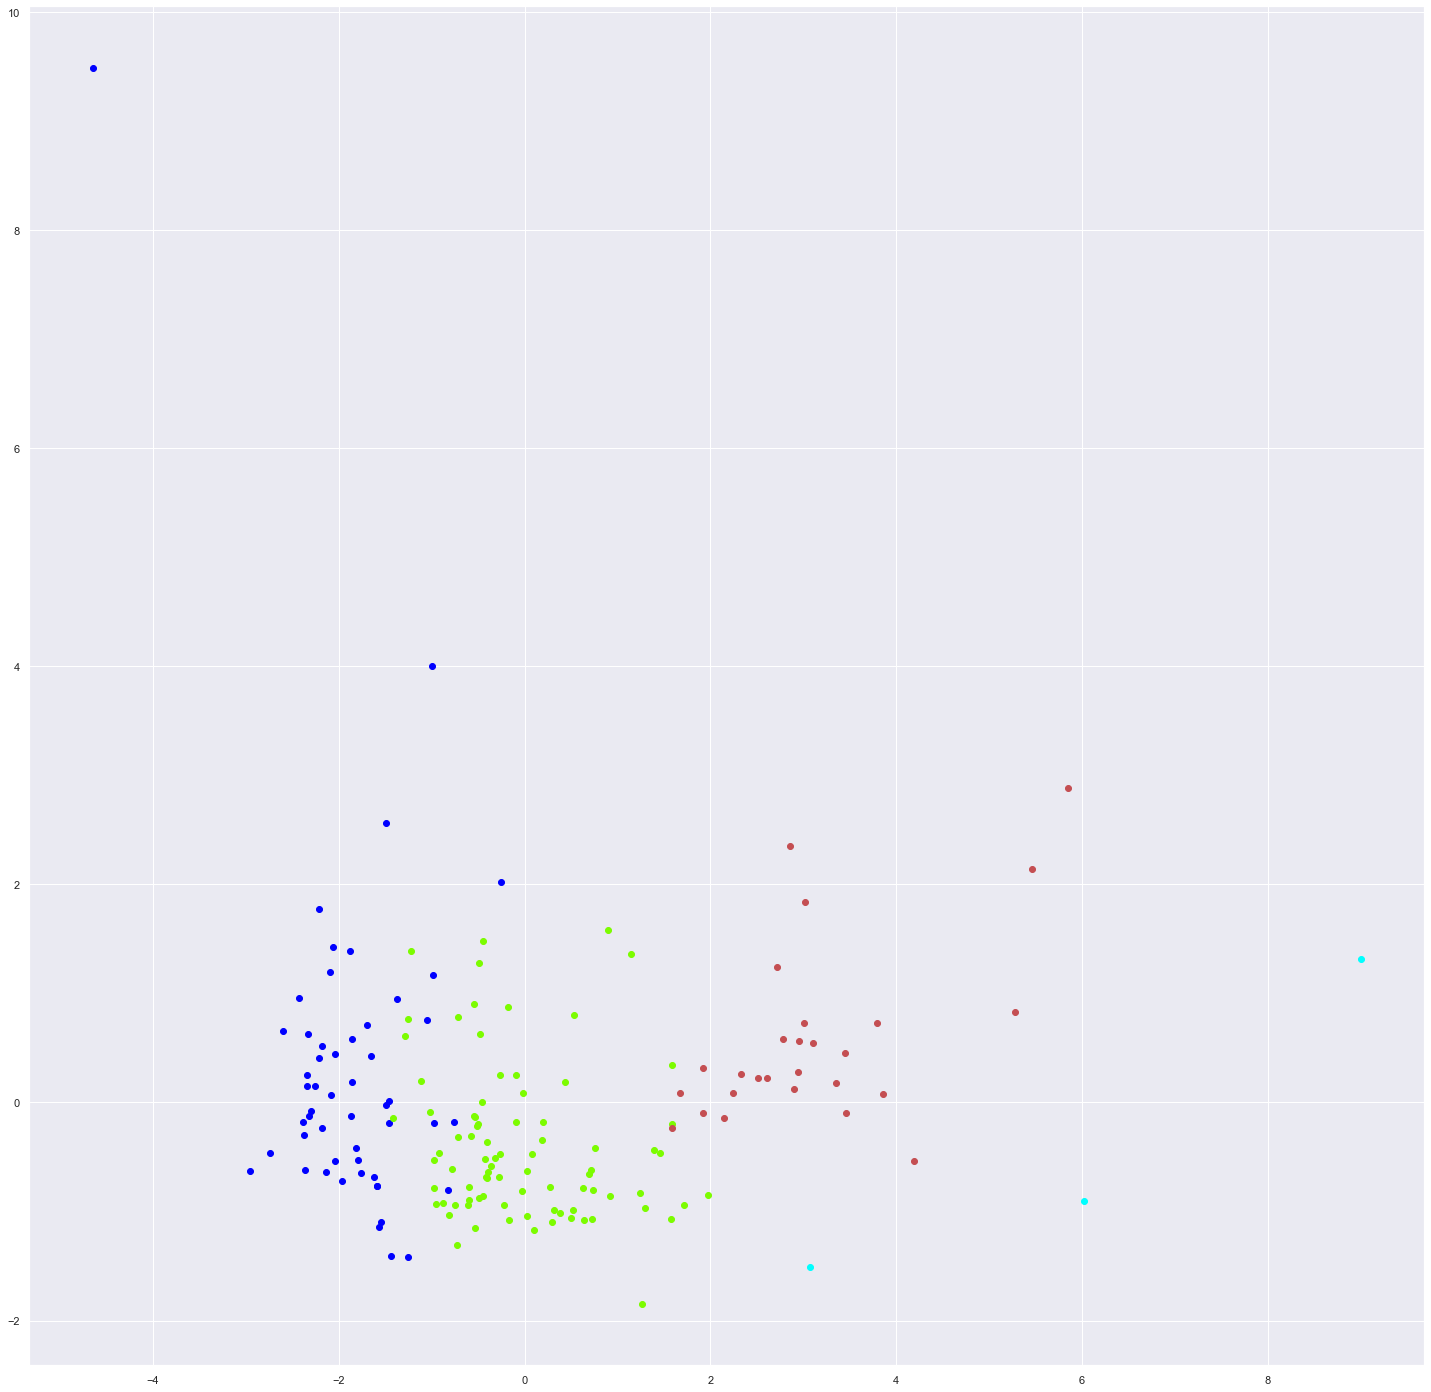

In [140]:
plt.figure(figsize=(25,25))
for couleur,k in zip(['blue','lawngreen','aqua', "r"],range(cluster_count)):
    plt.scatter(coord_pca[df_clustered["cluster"]==k,0],coord_pca[df_clustered["cluster"]==k,1],c=couleur)
plt.show()

In [141]:
# ## Qualité des clusters
df_clustered.sort_values(by=["cluster", "country"])

country  child_mort  exports  health  imports  income  \
0             Afghanistan        90.2     10.0    7.58     44.9    1610   
3                  Angola       119.0     62.3    2.85     42.9    5900   
17                  Benin       111.0     23.8    4.10     37.2    1820   
21               Botswana        52.5     43.6    8.30     51.3   13300   
25           Burkina Faso       116.0     19.2    6.74     29.6    1430   
..                    ...         ...      ...     ...      ...     ...   
144                Sweden         3.0     46.2    9.63     40.7   42900   
145           Switzerland         4.5     64.0   11.50     53.3   55500   
157  United Arab Emirates         8.6     77.7    3.66     63.6   57600   
158        United Kingdom         5.2     28.2    9.64     30.8   36200   
159         United States         7.3     12.4   17.90     15.8   49400   

     inflation  life_expec  total_fer   gdpp        Class  cluster  
0        9.440        56.2       5.82    553  Undeveloped        0  
3       22.400        60.1       6.16   3530  Undeveloped        0  
17       0.885        61.8       5.36    758  Undeveloped        0  
21       8.920        57.1       2.88   6350  Undeveloped        0  
25       6.810        57.9       5.87    575  Undeveloped        0  
..         ...         ...        ...    ...          ...      ...  
144      0.991        81.5       1.98  52100    Developed        3  
145      0.317        82.2       1.52  74600    Developed        3  
157     12.500        76.5       1.87  35000    Developed        3  
158      1.570        80.3       1.92  38900    Developed        3  
159      1.220        78.7       1.93  48400    Developed        3  

[167 rows x 12 columns]

In [142]:
# ### Davies / Blondin par cluster

def format_2Decimals(prm_number):
    return  "{:.2f}".format(prm_number)


from sklearn import metrics as metrics

for nbr in range(cluster_count):
    print(nbr, format_2Decimals(metrics.davies_bouldin_score(coord_pca, cluster_labels==nbr)), df_clustered.groupby(df_clustered["cluster"]).size()[nbr])



0 1.24 53
1 2.89 84
2 0.65 3
3 0.88 27


In [143]:
# ### Score silouhette par cluster

for nbr in range(cluster_count):
    print(nbr, format_2Decimals(metrics.silhouette_score(coord_pca, df_clustered["cluster"]==nbr)), df_clustered.groupby(df_clustered["cluster"]).size()[nbr])

0 0.28 53
1 0.18 84
2 0.62 3
3 0.42 27


In [144]:
# inertie par cluster

distances = km.fit_transform(coord_pca)

for nbr in range(cluster_count): 
    print(nbr, format_2Decimals(distances[:,nbr].sum()), df_clustered.groupby(df_clustered["cluster"]).size()[nbr])

0 503.69 53
1 806.14 84
2 548.93 3
3 394.56 27


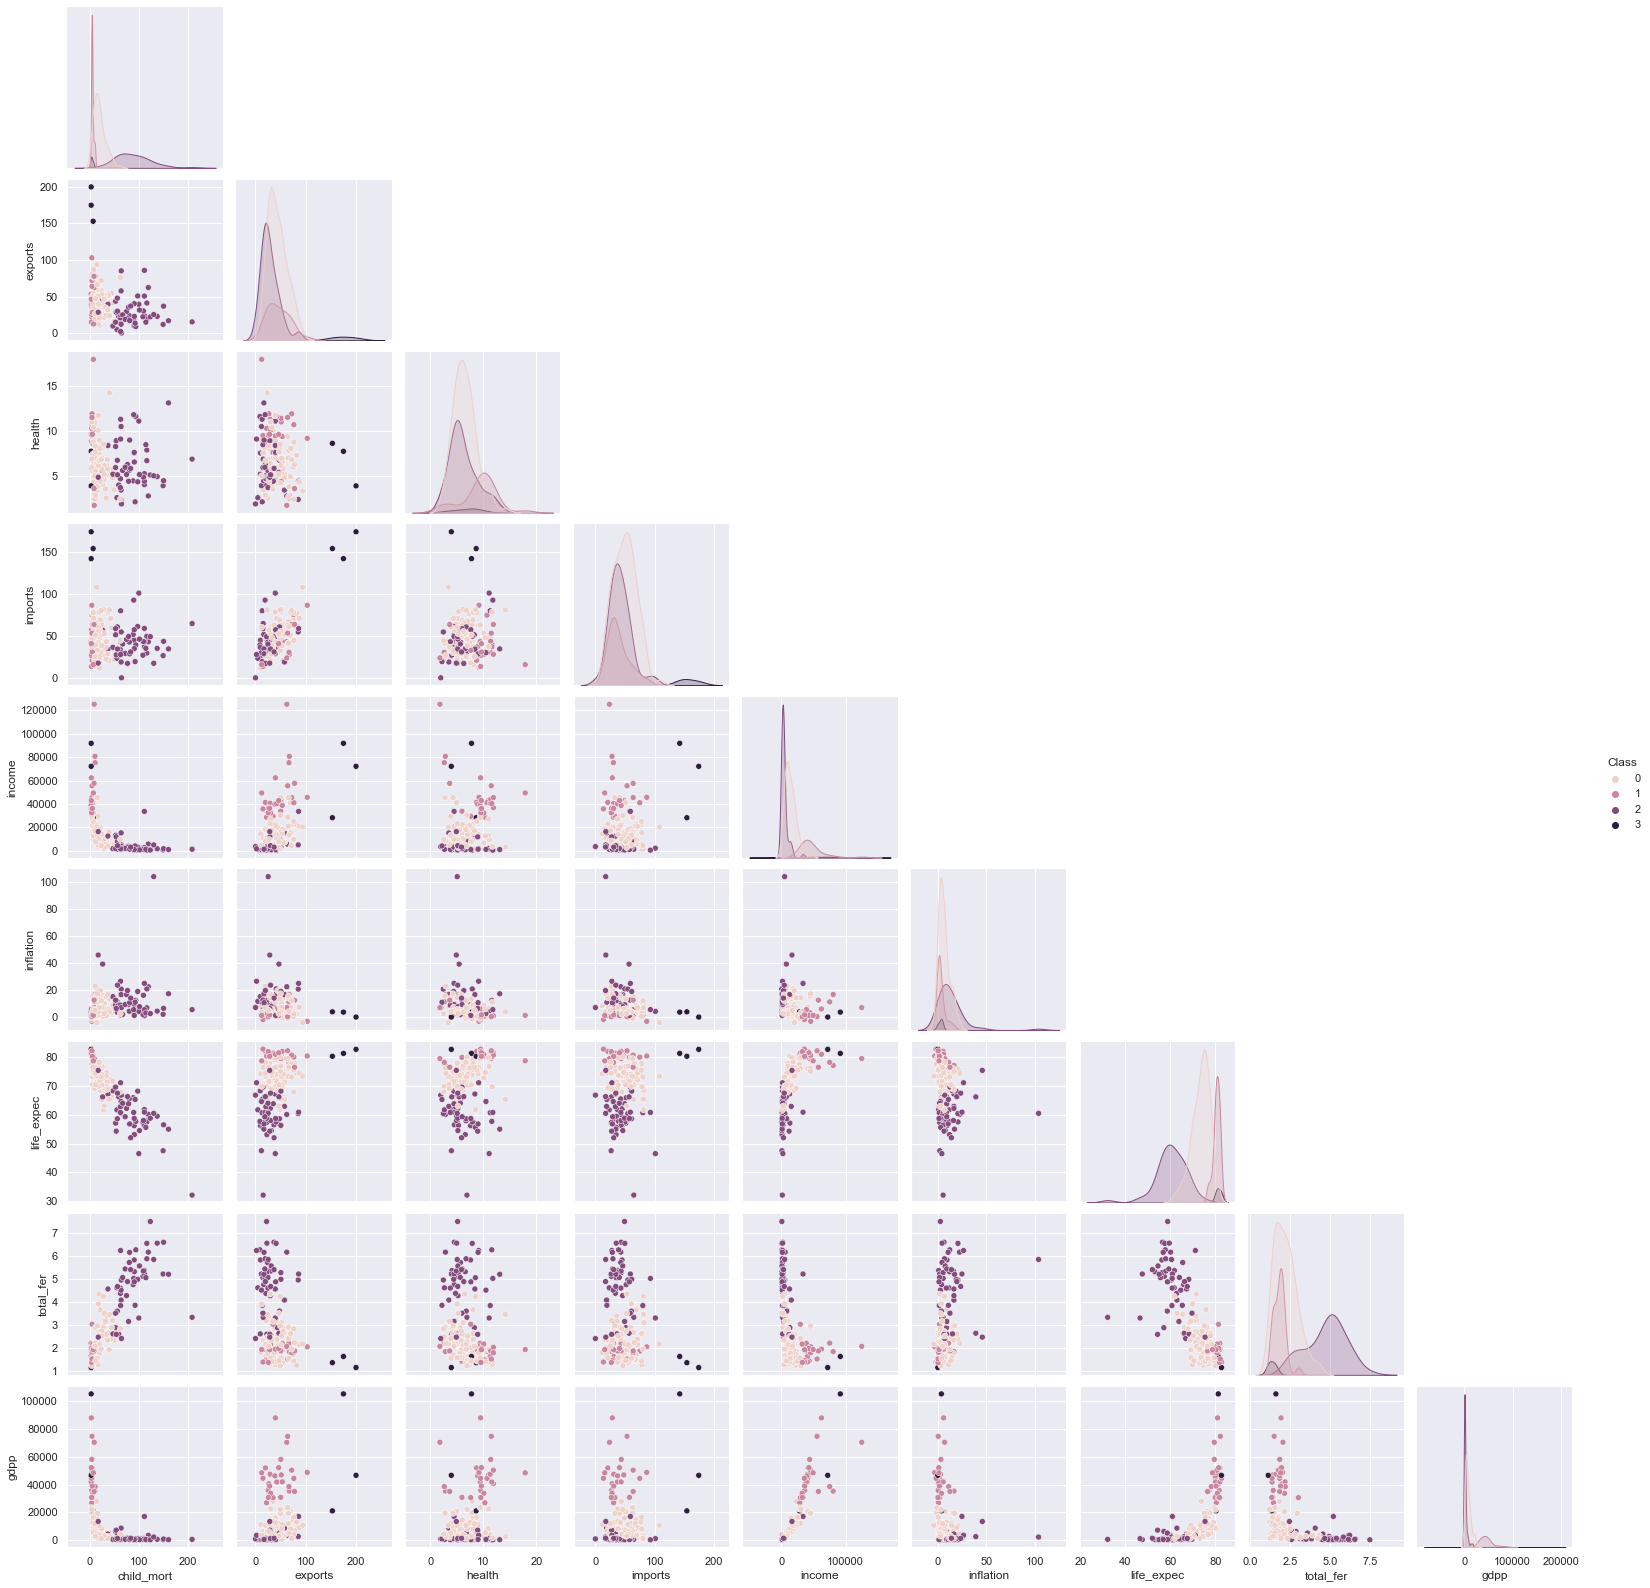

In [145]:
#Analyzing Clusters
dataKM = df1.copy()
dataKM['Class'] = pcaPredKM
sns.pairplot(dataKM, hue = "Class", corner = True)

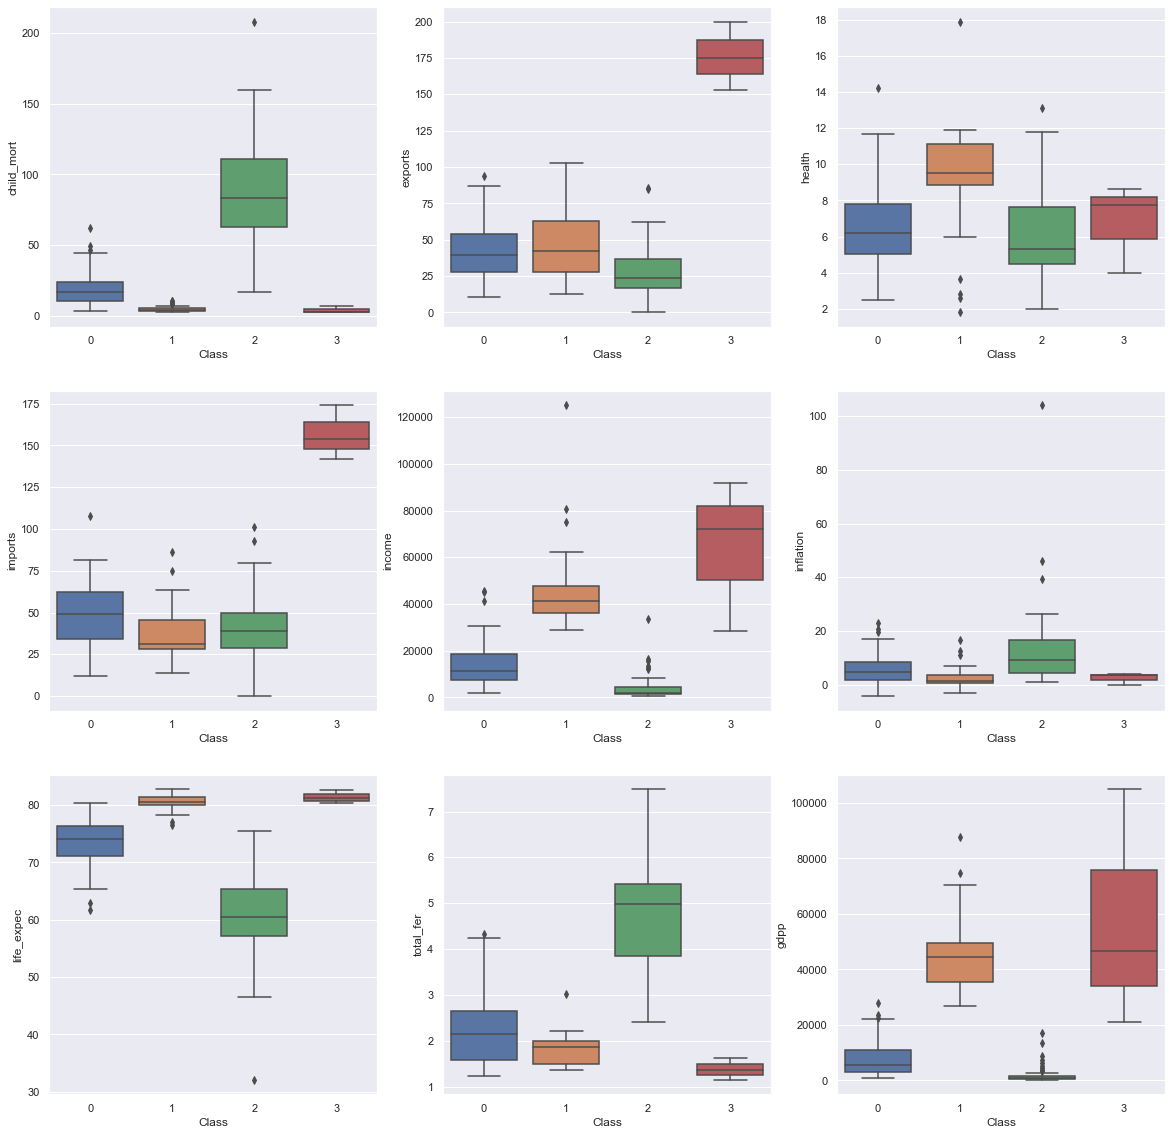

In [146]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 3, figsize = (20, 20))
ax = [ax1, ax2, ax3]
j, k = 0, 0 
for i in dataKM.drop(columns = "Class").columns:
    sns.boxplot(x = "Class", y = i, data = dataKM, ax = ax[j][k])
    if divmod(k,2) == (1,0): 
        j += 1
        k = 0
    else: k += 1
plt.show()

In [147]:
print(dataKM.Class.value_counts())
dataKM.groupby('Class').mean().round(2)

0    84
2    53
1    27
3     3
Name: Class, dtype: int64


child_mort  exports  health  imports    income  inflation  life_expec  \
Class                                                                          
0           19.12    43.02    6.46    49.16  14025.36       6.18       73.48   
1            5.09    45.60    9.17    38.73  47081.48       2.94       80.44   
2           87.45    28.16    6.19    41.24   4183.64      13.09       60.27   
3            4.13   176.00    6.79   156.67  64033.33       2.47       81.43   

       total_fer      gdpp  
Class                       
0           2.22   7739.81  
1           1.84  45629.63  
2           4.75   2078.68  
3           1.38  57566.67

In [125]:
#Class2 with 53 countries: It has higest child mortality rate, lowest GDPP & Income, and its inflation is significantly higher than other groups. Countries in this group will be most disadvantaged and Undeveloped.

#Class3 with 3 countries: It has the lowest child mortality rate, highest GDPP & Income, and has the lowest Inflation. This group contains most Well Developed countries with stable economies and health-care given that it has the highest life expectancy. 

#Class0 with 84 countries: It has the 2nd higest child mortality rate, 2nd lowest GDPP & Income, and even though its inflation is 2nd highest, its not significantly high. These countries are developing contries. 

#Class1 with 27 countries: It has 2nd lowest child mortality rate, 2nd highest GDPP & Income. Also its inflation is 2nd lowest. It has significantly higher spendings on health. This group has Developed countries. 

In [170]:
dataKM = df1.copy()
dataKM['Class'] = pcaPredKM
p = dataKM.Class.value_counts()
dataKM.Class[dataKM.Class == p.index[1]] = 11
dataKM.Class[dataKM.Class == p.index[2]] = 22
dataKM.Class[dataKM.Class == p.index[3]] = 33
dataKM.Class[dataKM.Class == p.index[0]] = 44

dataKM.Class.replace({ 11:2, 22:1 , 33:3 , 44:0 }, inplace = True)
dataKM.rename(columns = {"Class": "Priority"}, inplace = True)
dataKM.Priority.value_counts()

0    84
2    53
1    27
3     3
Name: Priority, dtype: int64

In [171]:
dataKM

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  Priority  
0         5.82    553         2  
1         1.65   4090         0  
2         2.89   4460         0  
3         6.16   3530         2  
4         2.13  12200         0  
..         ...    ...       ...  
162       3.50   2970         0  
163       2.47  13500         2  
164       1.95   1310         0  
165       4.67   1310         2  
166       5.40   1460         2  

[167 rows x 10 columns]

In [174]:
cat = {2: 'Undeveloped', 0: 'Developing', 1: 'Developed', 3: 'Well Developed'}
dataKM['country'] = df['country']
dataKM.Priority.replace(cat, inplace = True)

px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
              color = dataKM['Priority'], title = 'Countries by category',
              color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},projection = 'equirectangular')

In [175]:
df['Class'] = dataKM.Priority
Well_Developed = df[df.Class == 'Well Developed']
Well_Developed.country

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object

In [176]:
df['Class'] = dataKM.Priority
Developed = df[df.Class == 'Developed']
Developed.country

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
110             Netherlands
111             New Zealand
114                  Norway
123                   Qatar
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

In [177]:
df['Class'] = dataKM.Priority
Developing = df[df.Class == 'Developing']
Developing.country

1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
156                Ukraine
160                Uruguay
161             Uzbekistan
162                Vanuatu
164                Vietnam
Name: country, Length: 84, dtype: object

In [178]:
df['Class'] = dataKM.Priority
Undeveloped = df[df.Class == 'Undeveloped']
Undeveloped.country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo; Dem, Rep,
38                  Congo; Rep,
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99      

In [179]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in African continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             projection='equirectangular', scope = 'africa')

In [180]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in Asia continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'asia')

In [181]:
df2.loc[['South Korea','Oman',"Portugal","Spain","Japan"],['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

child_mort  exports  health  imports  income  inflation  \
country                                                                
South Korea         4.1     49.4    6.93     46.2   30400      3.160   
Oman               11.7     65.7    2.77     41.2   45300     15.600   
Portugal            3.9     29.9   11.00     37.4   27200      0.643   
Spain               3.8     25.5    9.54     26.8   32500      0.160   
Japan               3.2     15.0    9.49     13.6   35800     -1.900   

             life_expec  total_fer   gdpp  
country                                    
South Korea        80.1       1.23  22100  
Oman               76.1       2.90  19300  
Portugal           79.8       1.39  22500  
Spain              81.9       1.37  30700  
Japan              82.8       1.39  44500

In [182]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in Europe continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'europe')

In [183]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries in North america continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'north america')

In [184]:
px.choropleth(data_frame = dataKM, locationmode = 'country names', locations = 'country', 
             color = dataKM.Priority, title = 'Countries South america continent',
             color_discrete_map = {'Undeveloped':'#DB1C18', 'Developing':'#EBB331',
                                  'Developed':'#67E232', 'Well Developed':'#51A2DB'},
             scope = 'south america')

In [191]:
#Représentation du cerle de corrélation
# racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((K-1,K-1))
for k in range(K-1):
    corvar[:,k-1] = sqrt_eigval[k-1] * acp.components_[k-1,:]
print(corvar.round(2))

[[-0.53  0.09  0.11  0.47  0.07  0.03 -0.01 -0.04  0.24]
 [ 0.59 -0.06  0.77 -0.03  0.04 -0.02 -0.18 -0.11 -0.02]
 [ 0.23 -0.13 -0.28  0.2  -0.59  0.01 -0.15  0.01  0.  ]
 [ 0.26 -0.35  0.65  0.07 -0.25  0.01  0.19  0.11  0.02]
 [ 0.89  0.29  0.01  0.09  0.18  0.06 -0.12  0.2   0.03]
 [-0.46  1.01  0.27 -0.19 -0.22  0.01  0.03  0.   -0.  ]
 [ 0.59  0.01 -0.15 -0.4  -0.04 -0.13  0.    0.03  0.18]
 [-0.49  0.12  0.09  0.43  0.06 -0.16 -0.04  0.09 -0.09]
 [ 1.33  0.35 -0.18  0.37  0.   -0.02  0.14 -0.1  -0.03]]


In [193]:
print(pd.DataFrame({'id':df2.columns,'COR_1':corvar[:,0].round(2),'COR_2':corvar[:,1].round(2)}))

           id  COR_1  COR_2
0  child_mort  -0.53   0.09
1     exports   0.59  -0.06
2      health   0.23  -0.13
3     imports   0.26  -0.35
4      income   0.89   0.29
5   inflation  -0.46   1.01
6  life_expec   0.59   0.01
7   total_fer  -0.49   0.12
8        gdpp   1.33   0.35


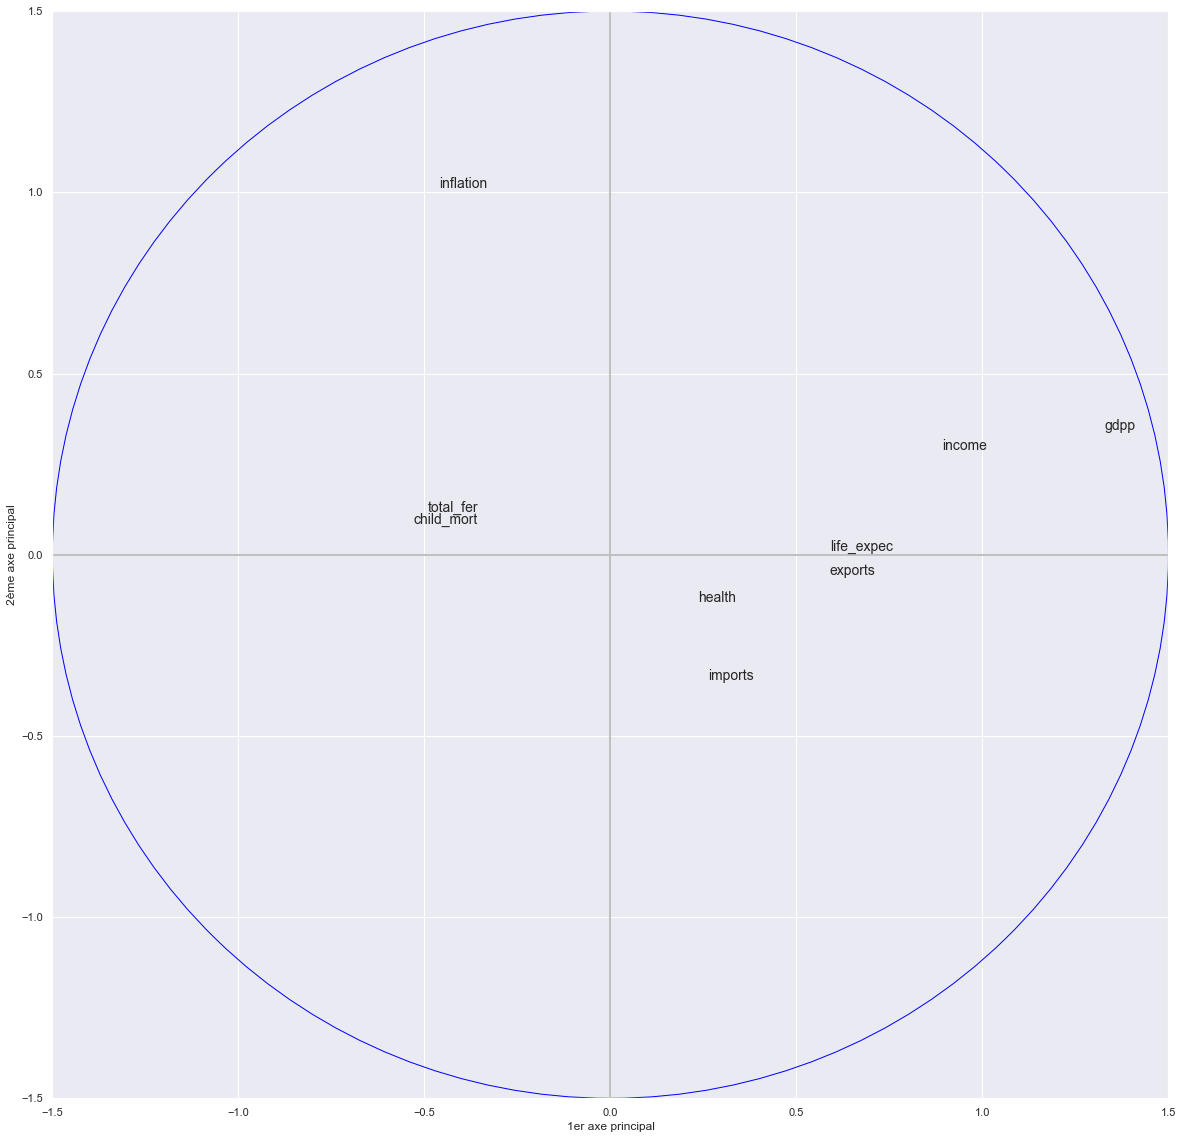

In [187]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-1.5,1.5)
axes.set_ylim(-1.5,1.5)
#affichage des étiquettes (noms des variables)
for j in range(K-1):
    plt.annotate(df1.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1.5,1.5],[0,0],color='silver',linestyle='-',linewidth=2)
plt.plot([0,0],[-1.5,1.5],color='silver',linestyle='-',linewidth=2)
#ajouter un cercle
cercle = plt.Circle((0,0),1.5,color='blue',fill=False)
plt.ylabel("2ème axe principal")
plt.xlabel("1er axe principal")
axes.add_artist(cercle)
#affichage
plt.show()